In [1]:
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os
import yaml
import copy

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('insurance_claims.csv')

In [3]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [4]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [5]:
df.replace('?', np.nan, inplace = True)


In [6]:
df.shape

(1000, 40)

In [7]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted            91
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

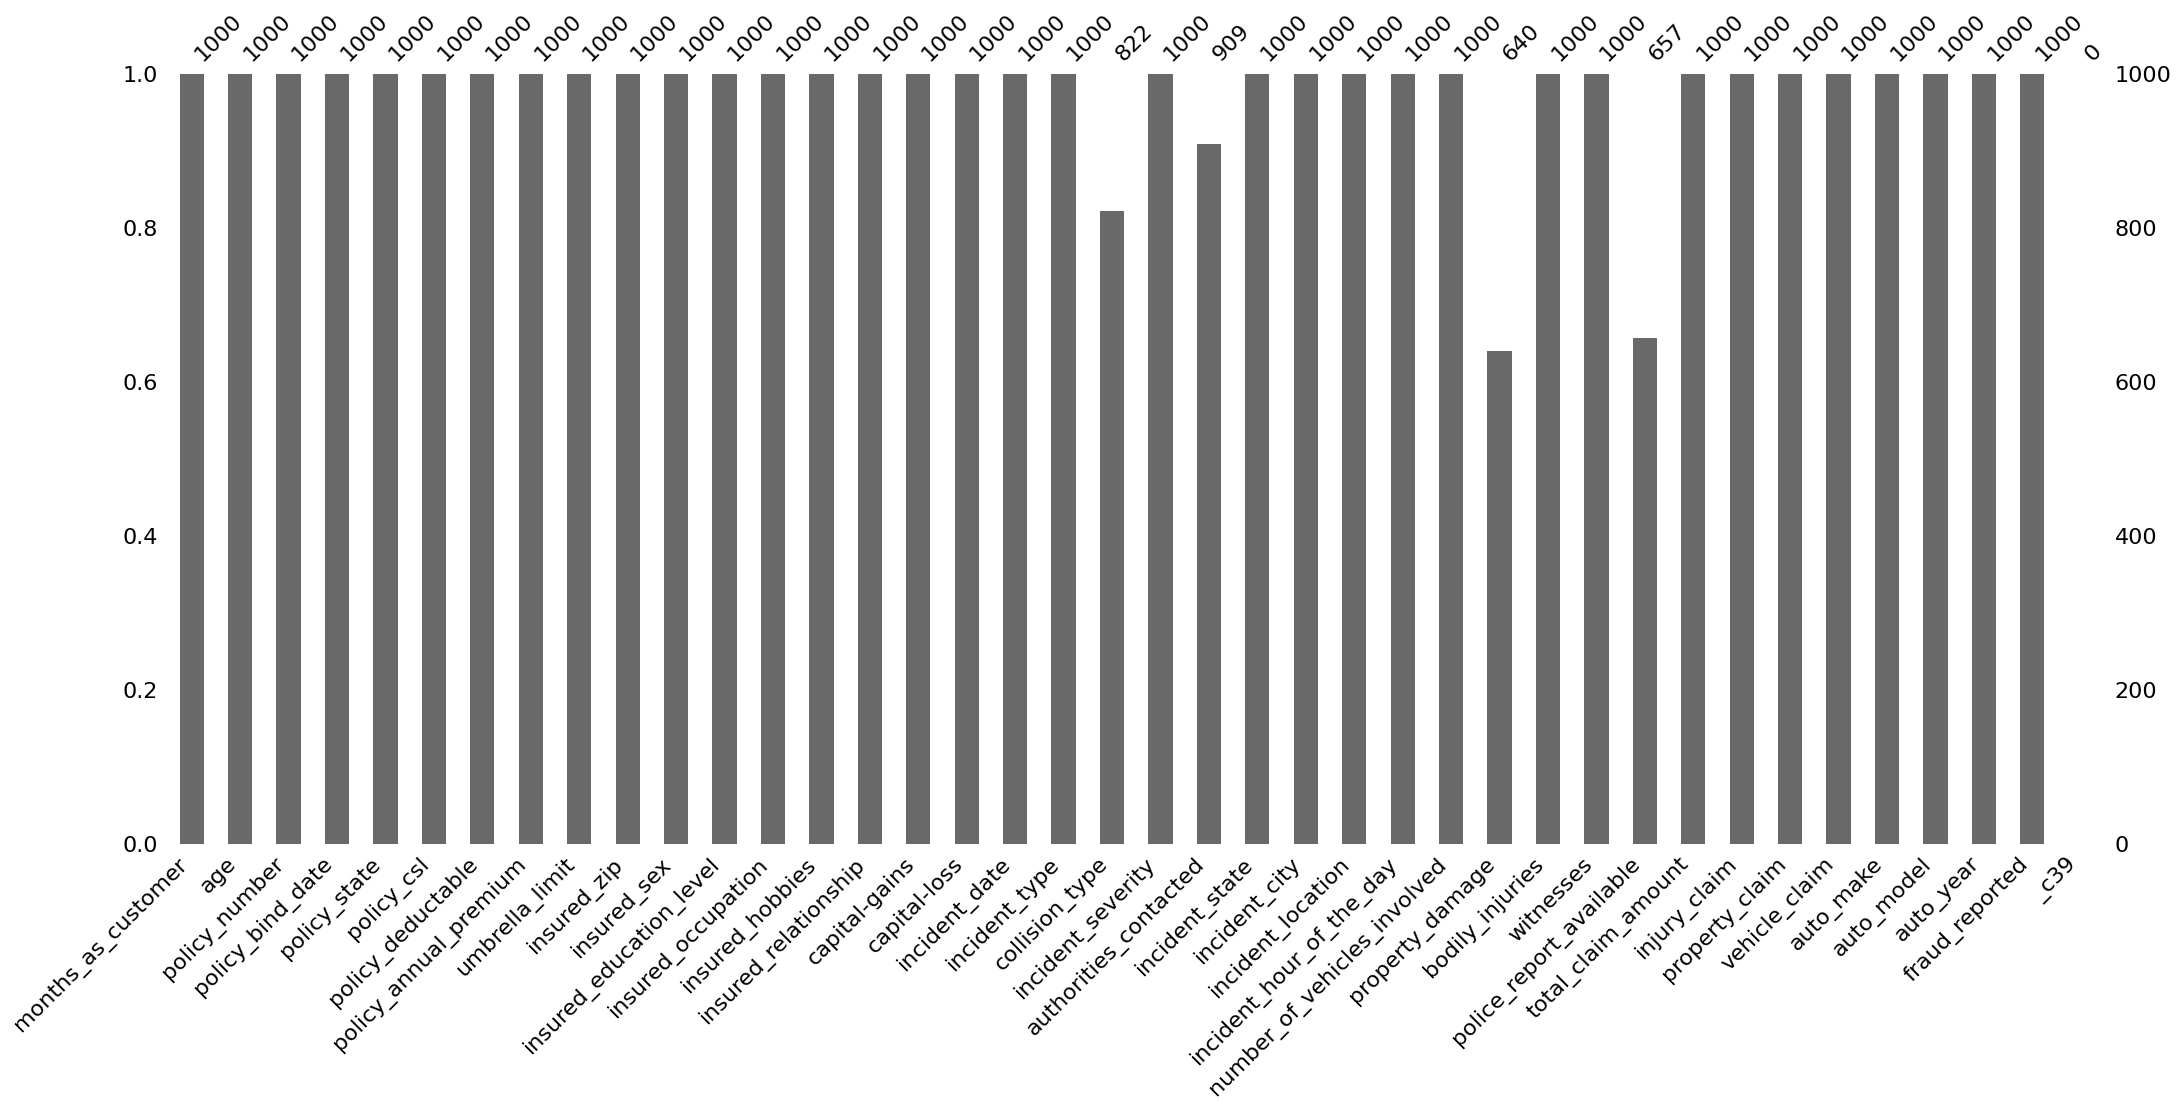

In [8]:
import missingno as msno

msno.bar(df)
plt.show()

In [9]:
df.collision_type.unique()

array(['Side Collision', nan, 'Rear Collision', 'Front Collision'],
      dtype=object)

In [10]:
df['collision_type'] = df['collision_type'].fillna(df['collision_type'].mode()[0])
df['police_report_available'] = df['police_report_available'].fillna(df['police_report_available'].mode()[0])
df['property_damage'] = df['property_damage'].fillna(df['property_damage'].mode()[0])


In [11]:
df.incident_type.unique()

array(['Single Vehicle Collision', 'Vehicle Theft',
       'Multi-vehicle Collision', 'Parked Car'], dtype=object)

In [12]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [13]:
cat_df = df.select_dtypes(include = ['object'])
num_df = df.select_dtypes(include = ['float64', 'int64'])



In [14]:
cat_df.head()

,policy_bind_date,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_date,incident_type,...,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,property_damage,police_report_available,auto_make,auto_model,fraud_reported
0,2014-10-17,OH,250/500,MALE,MD,craft-repair,sleeping,husband,2015-01-25,Single Vehicle Collision,...,Major Damage,Police,SC,Columbus,9935 4th Drive,YES,YES,Saab,92x,Y
1,2006-06-27,IN,250/500,MALE,MD,machine-op-inspct,reading,other-relative,2015-01-21,Vehicle Theft,...,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,NO,NO,Mercedes,E400,Y
2,2000-09-06,OH,100/300,FEMALE,PhD,sales,board-games,own-child,2015-02-22,Multi-vehicle Collision,...,Minor Damage,Police,NY,Columbus,7121 Francis Lane,NO,NO,Dodge,RAM,N
3,1990-05-25,IL,250/500,FEMALE,PhD,armed-forces,board-games,unmarried,2015-01-10,Single Vehicle Collision,...,Major Damage,Police,OH,Arlington,6956 Maple Drive,NO,NO,Chevrolet,Tahoe,Y
4,2014-06-06,IL,500/1000,MALE,Associate,sales,board-games,unmarried,2015-02-17,Vehicle Theft,...,Minor Damage,NaN,NY,Arlington,3041 3rd Ave,NO,NO,Accura,RSX,N


In [15]:
cat_df = cat_df.drop(['policy_bind_date', 'incident_date'], axis=1)

In [16]:
# printing unique values of each column
for col in cat_df.columns:
    print(f"{col}: \n{cat_df[col].unique()}\n")

policy_state: 
['OH' 'IN' 'IL']

policy_csl: 
['250/500' '100/300' '500/1000']

insured_sex: 
['MALE' 'FEMALE']

insured_education_level: 
['MD' 'PhD' 'Associate' 'Masters' 'High School' 'College' 'JD']

insured_occupation: 
['craft-repair' 'machine-op-inspct' 'sales' 'armed-forces' 'tech-support'
 'prof-specialty' 'other-service' 'priv-house-serv' 'exec-managerial'
 'protective-serv' 'transport-moving' 'handlers-cleaners' 'adm-clerical'
 'farming-fishing']

insured_hobbies: 
['sleeping' 'reading' 'board-games' 'bungie-jumping' 'base-jumping' 'golf'
 'camping' 'dancing' 'skydiving' 'movies' 'hiking' 'yachting' 'paintball'
 'chess' 'kayaking' 'polo' 'basketball' 'video-games' 'cross-fit'
 'exercise']

insured_relationship: 
['husband' 'other-relative' 'own-child' 'unmarried' 'wife' 'not-in-family']

incident_type: 
['Single Vehicle Collision' 'Vehicle Theft' 'Multi-vehicle Collision'
 'Parked Car']

collision_type: 
['Side Collision' 'Rear Collision' 'Front Collision']

incident_severit

In [17]:
cat_df[['Pin_code', 'street']] = cat_df['incident_location'].str.extract(r'(^\d{4})(.*)')


In [18]:
cat_df['policy_state'], uniques = pd.factorize(cat_df['policy_state'])
cat_df['policy_csl'], uniques = pd.factorize(cat_df['policy_csl'])
cat_df['insured_sex'], uniques = pd.factorize(cat_df['insured_sex'])
cat_df['insured_education_level'], uniques = pd.factorize(cat_df['insured_education_level'])
cat_df['insured_occupation'], uniques = pd.factorize(cat_df['insured_occupation'])
cat_df['insured_hobbies'], uniques = pd.factorize(cat_df['insured_hobbies'])
cat_df['insured_relationship'], uniques = pd.factorize(cat_df['insured_relationship'])
cat_df['Pin_code'], uniques = pd.factorize(cat_df['Pin_code']) 
cat_df['auto_make'], uniques = pd.factorize(cat_df['auto_make'])
cat_df['incident_city'], uniques = pd.factorize(cat_df['incident_city'])
cat_df['fraud_reported'] = cat_df['fraud_reported'].map({'N': 0, 'Y': 1})
cat_df['auto_model'], uniques = pd.factorize(cat_df['auto_model'])
cat_df['property_damage'], uniques = pd.factorize(cat_df['property_damage'])
cat_df['police_report_available'], uniques = pd.factorize(cat_df['police_report_available'])
cat_df['incident_type'], uniques = pd.factorize(cat_df['incident_type'])
cat_df['collision_type'], uniques = pd.factorize(cat_df['collision_type'])
cat_df['incident_severity'], uniques = pd.factorize(cat_df['incident_severity'])


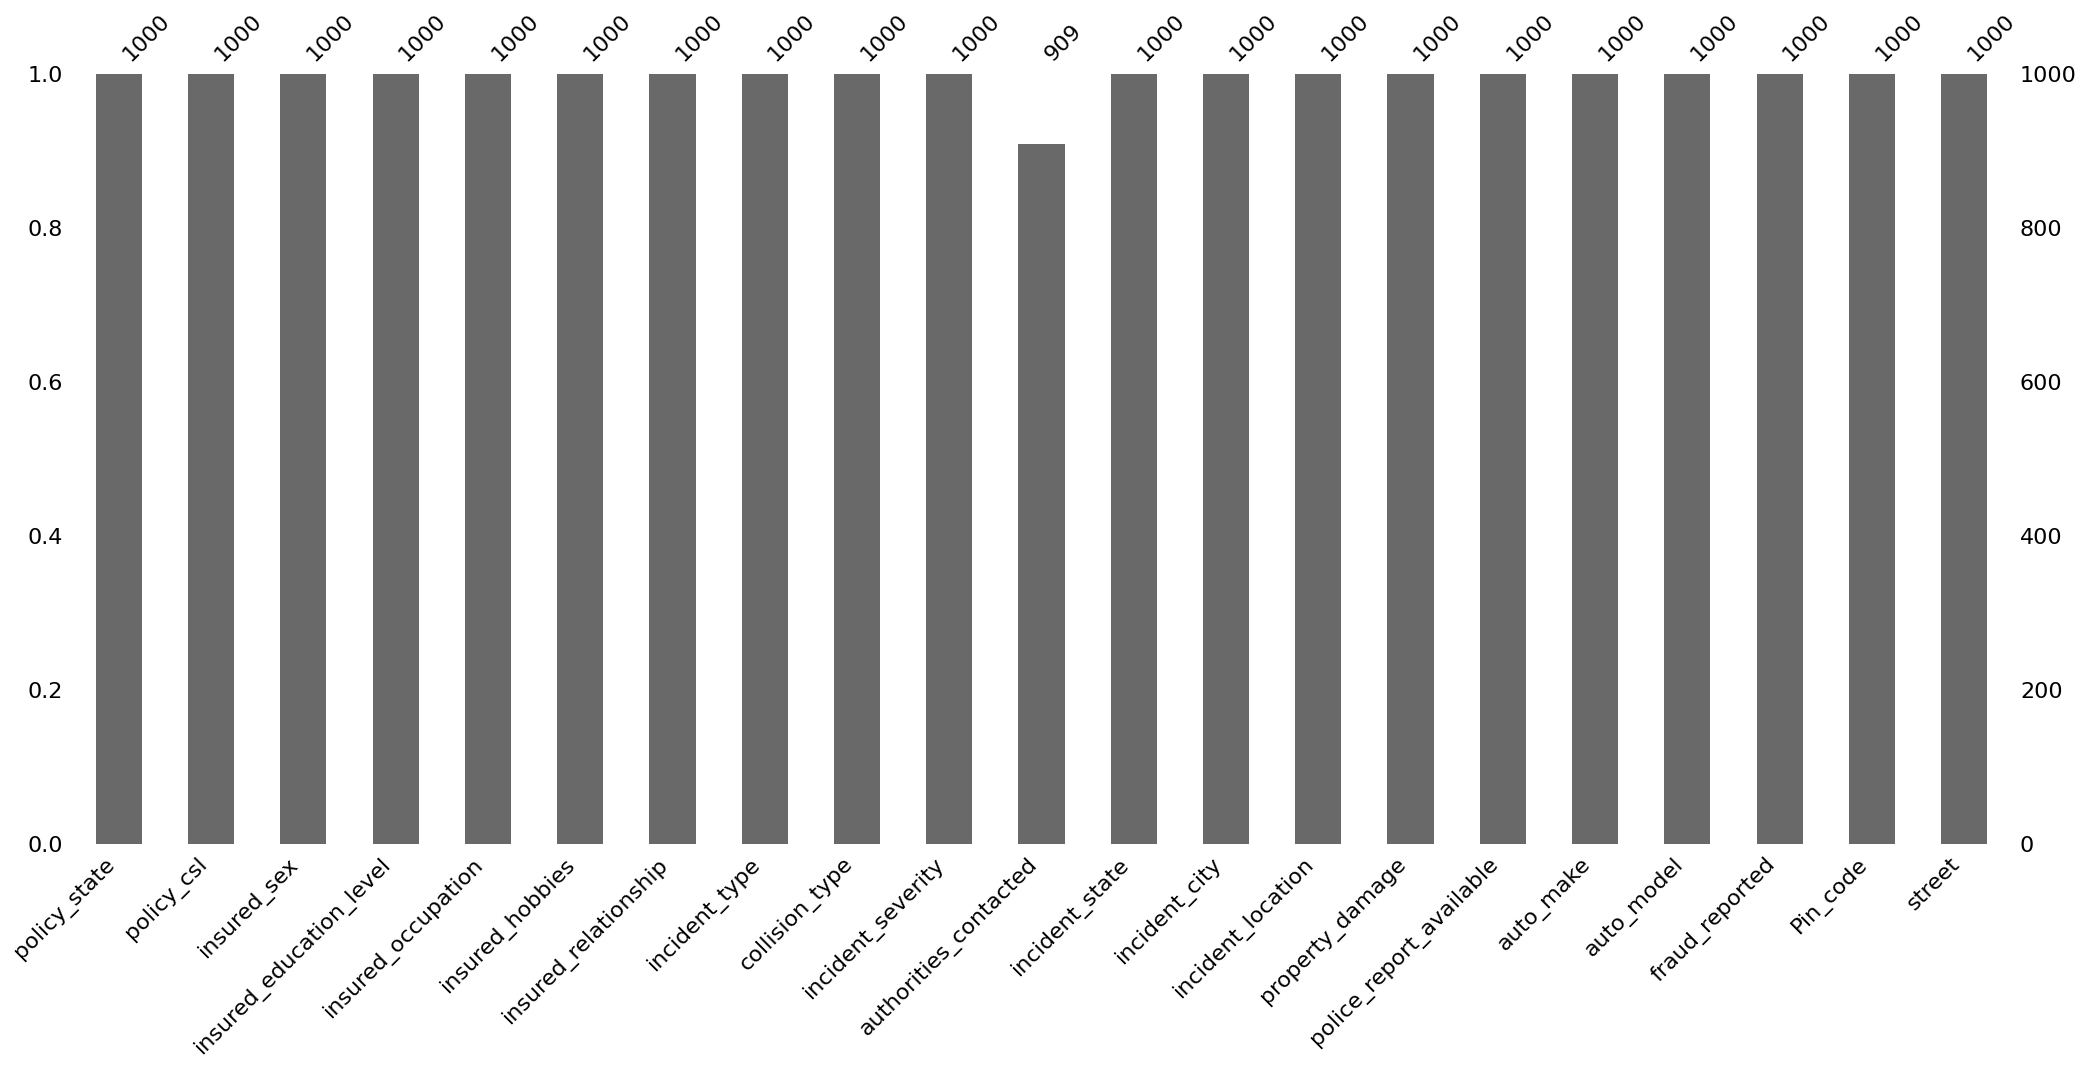

In [19]:
msno.bar(cat_df)
plt.show()

In [20]:
cat_df.police_report_available.unique()
cat_df['police_report_available'].value_counts()


police_report_available
1    686
0    314
Name: count, dtype: int64

In [21]:

# Set display option to show all columns
pd.set_option('display.max_columns', None)


In [22]:

# Select numeric columns from num_df and cat_df
num_from_num_df = num_df.select_dtypes(include=['int64', 'float64'])
num_from_cat_df = cat_df.select_dtypes(include=['int64', 'float64'])

# Combine them into one DataFrame
all_numerical = pd.concat([num_from_num_df, num_from_cat_df], axis=1)

# Show the result
print("All numerical columns combined:")
print(all_numerical.head())


All numerical columns combined:
   months_as_customer  age  policy_number  policy_deductable  \
0                 328   48         521585               1000   
1                 228   42         342868               2000   
2                 134   29         687698               2000   
3                 256   41         227811               2000   
4                 228   44         367455               1000   

   policy_annual_premium  umbrella_limit  insured_zip  capital-gains  \
0                1406.91               0       466132          53300   
1                1197.22         5000000       468176              0   
2                1413.14         5000000       430632          35100   
3                1415.74         6000000       608117          48900   
4                1583.91         6000000       610706          66000   

   capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
0             0                         5                            1   
1 

In [23]:
all_numerical.head()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_type,collision_type,incident_severity,incident_city,property_damage,police_report_available,auto_make,auto_model,fraud_reported,Pin_code
0,328,48,521585,1000,1406.91,0,466132,53300,0,5,1,1,2,71610,6510,13020,52080,2004,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,228,42,342868,2000,1197.22,5000000,468176,0,0,8,1,0,0,5070,780,780,3510,2007,NaN,1,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1
2,134,29,687698,2000,1413.14,5000000,430632,35100,0,7,3,2,3,34650,7700,3850,23100,2007,NaN,0,1,1,1,2,2,2,2,1,1,0,1,1,2,2,0,2
3,256,41,227811,2000,1415.74,6000000,608117,48900,-62400,5,1,1,2,63400,6340,6340,50720,2014,NaN,2,0,1,1,3,2,3,0,2,0,2,1,1,3,3,1,3
4,228,44,367455,1000,1583.91,6000000,610706,66000,-46000,20,1,0,1,6500,1300,650,4550,2009,NaN,2,2,0,2,2,2,3,1,1,1,2,1,1,4,4,0,4


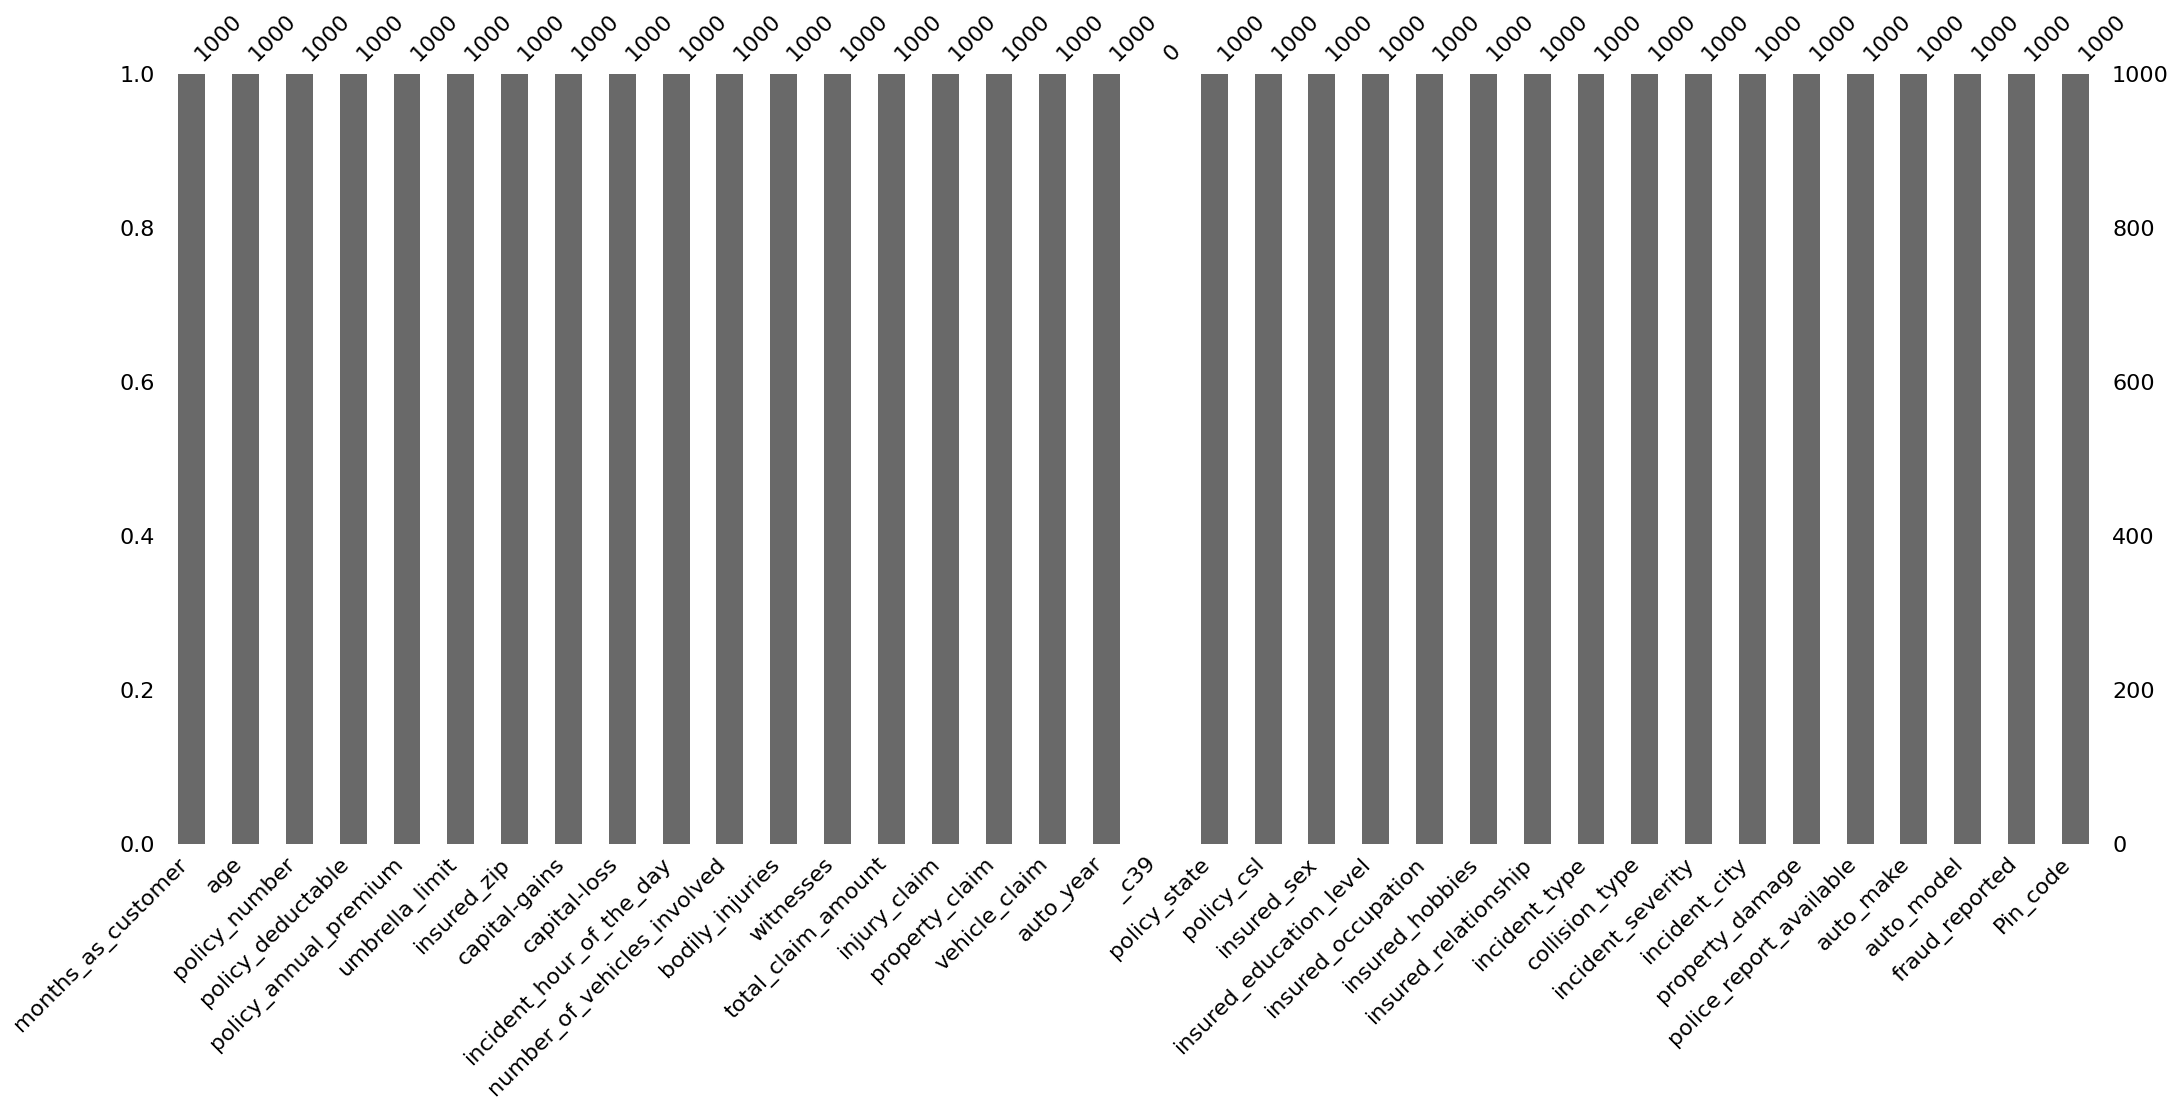

In [24]:
msno.bar(all_numerical)
plt.show()

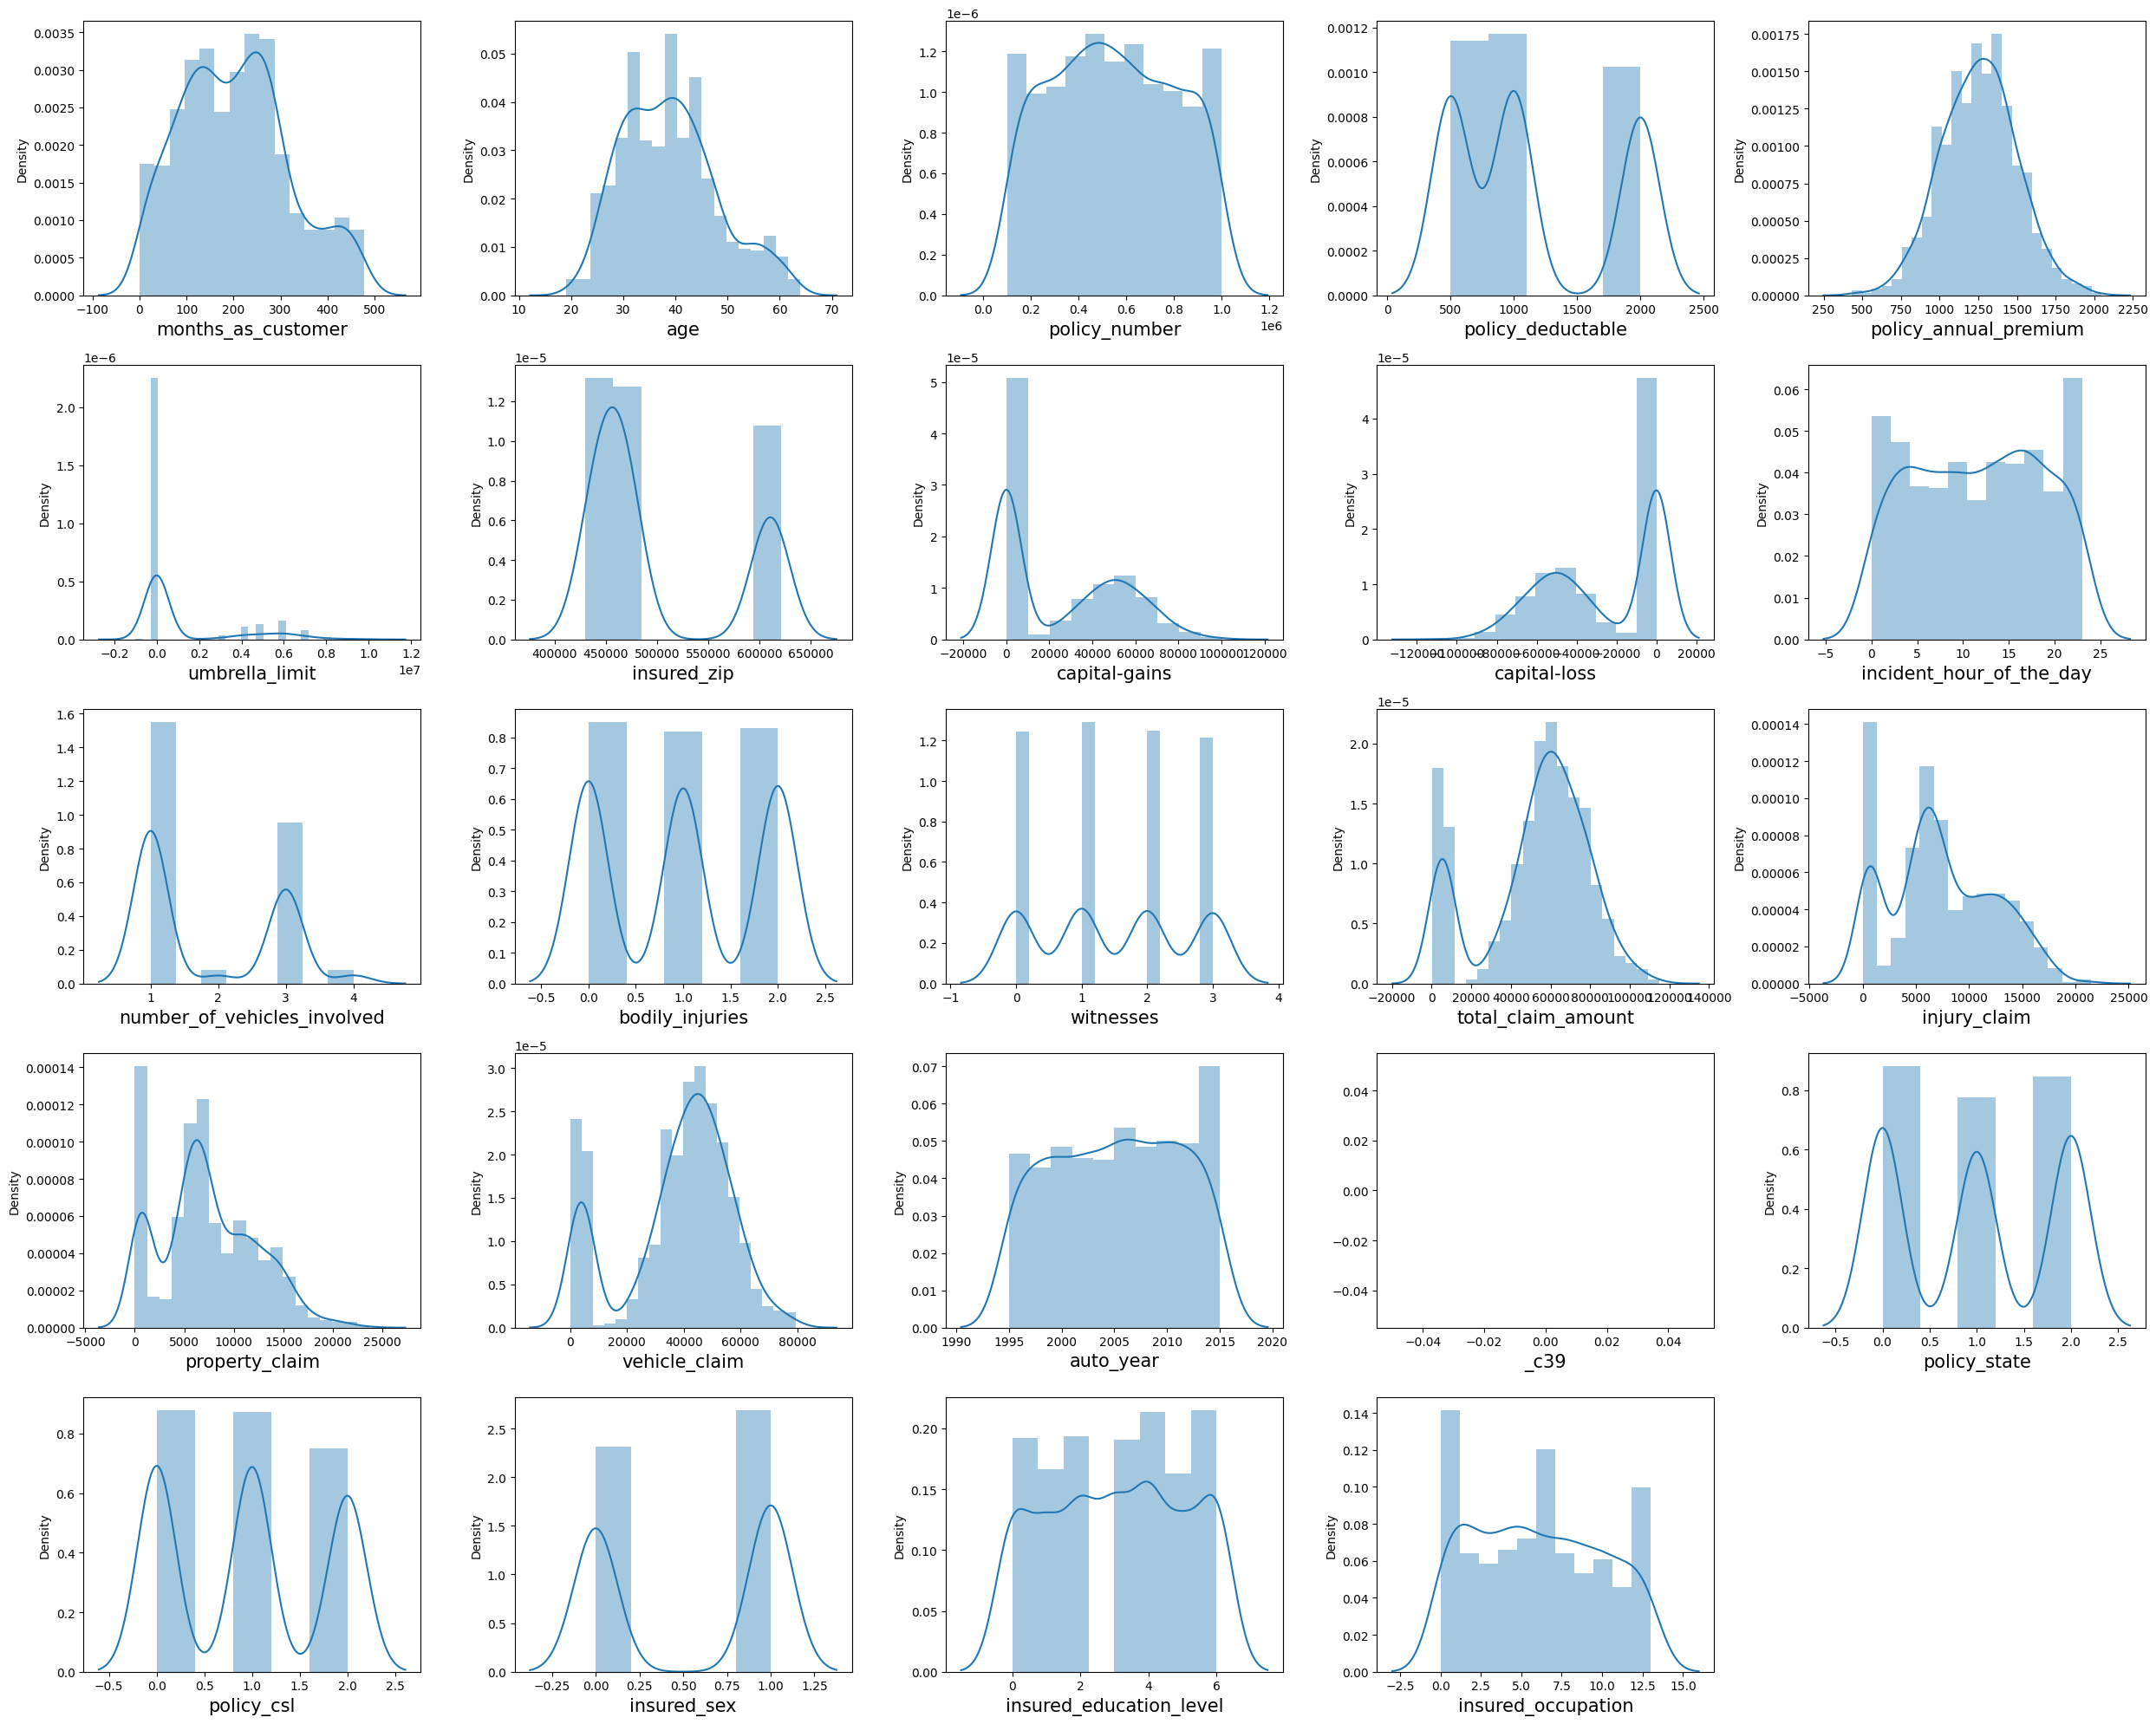

In [25]:
plt.figure(figsize = (25, 20))
plotnumber = 1

for col in all_numerical.columns:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plotnumber)
        sns.distplot(all_numerical[col])
        plt.xlabel(col, fontsize = 15)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

In [26]:
all_numerical.drop('_c39', axis=1, inplace=True)


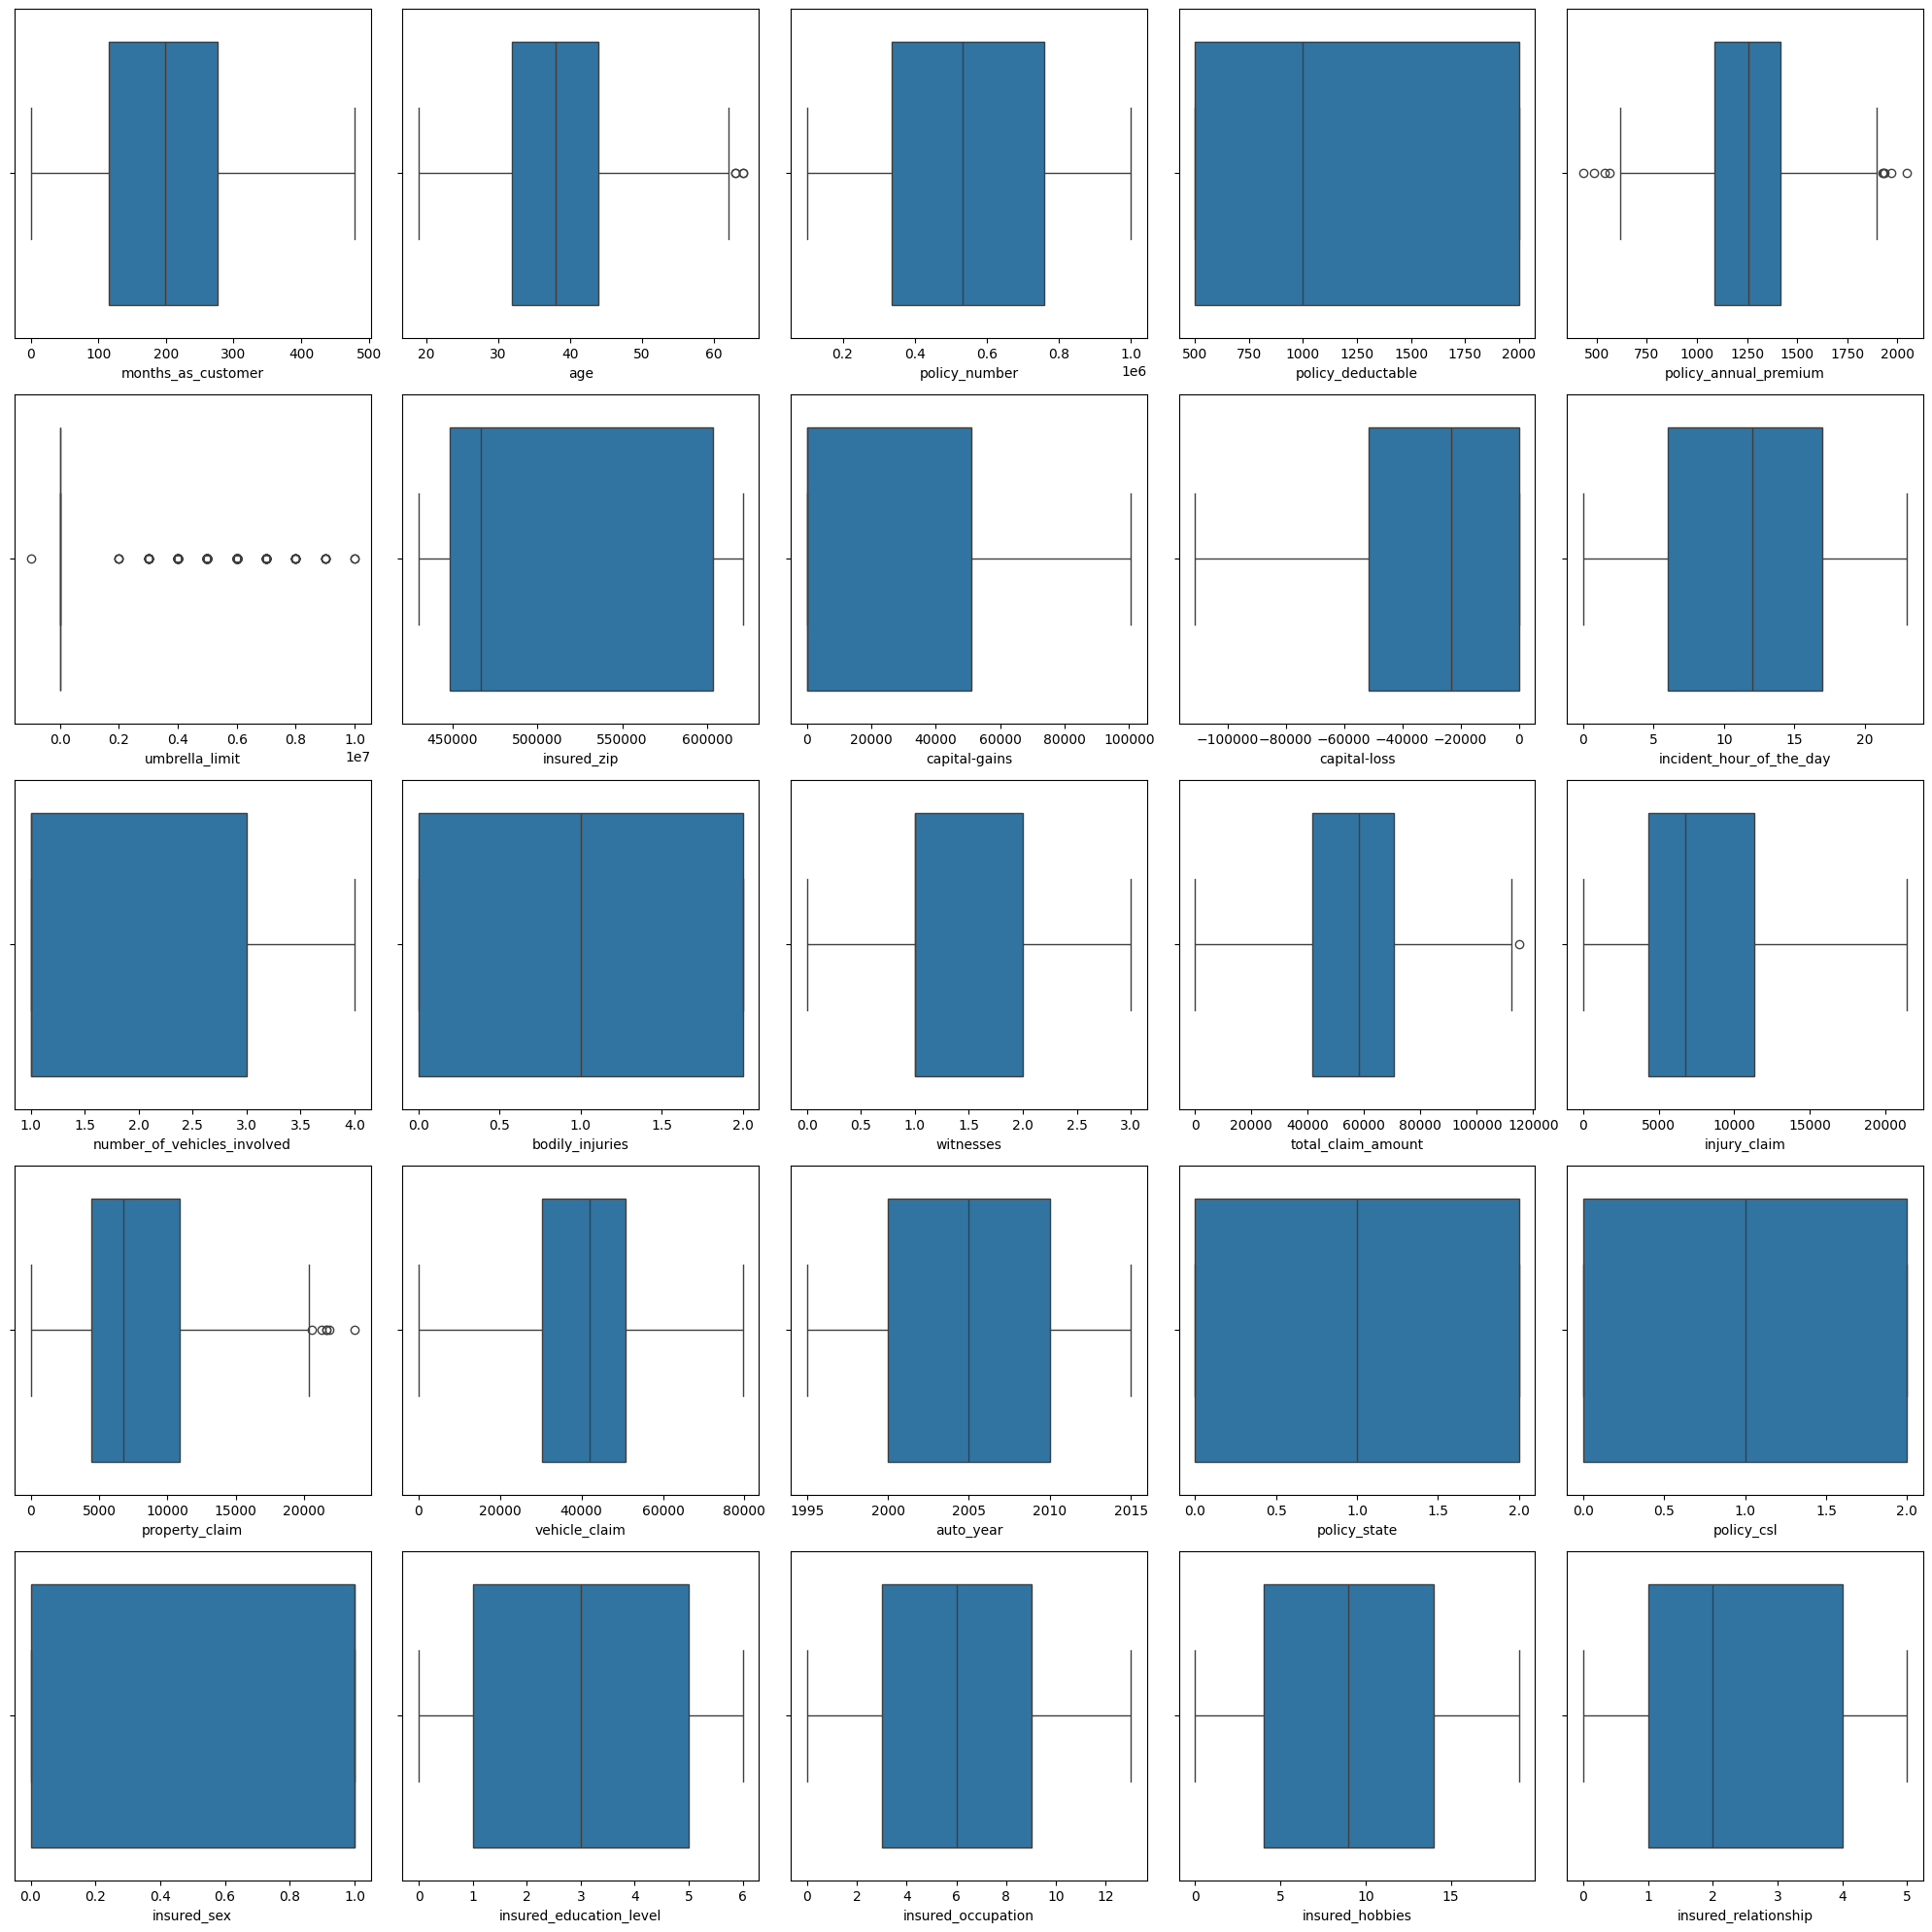

In [27]:
plt.figure(figsize=(20, 20))

# How many boxplots to show in grid
plotnumber = 1

# Loop through each numerical column
for col in all_numerical.columns:
    if plotnumber <= 25:  # 5x5 grid
        ax = plt.subplot(5, 5, plotnumber)
        sns.boxplot(x=all_numerical[col], ax=ax)
        plt.xlabel(col, fontsize=10)
        plotnumber += 1

plt.tight_layout()
plt.show()

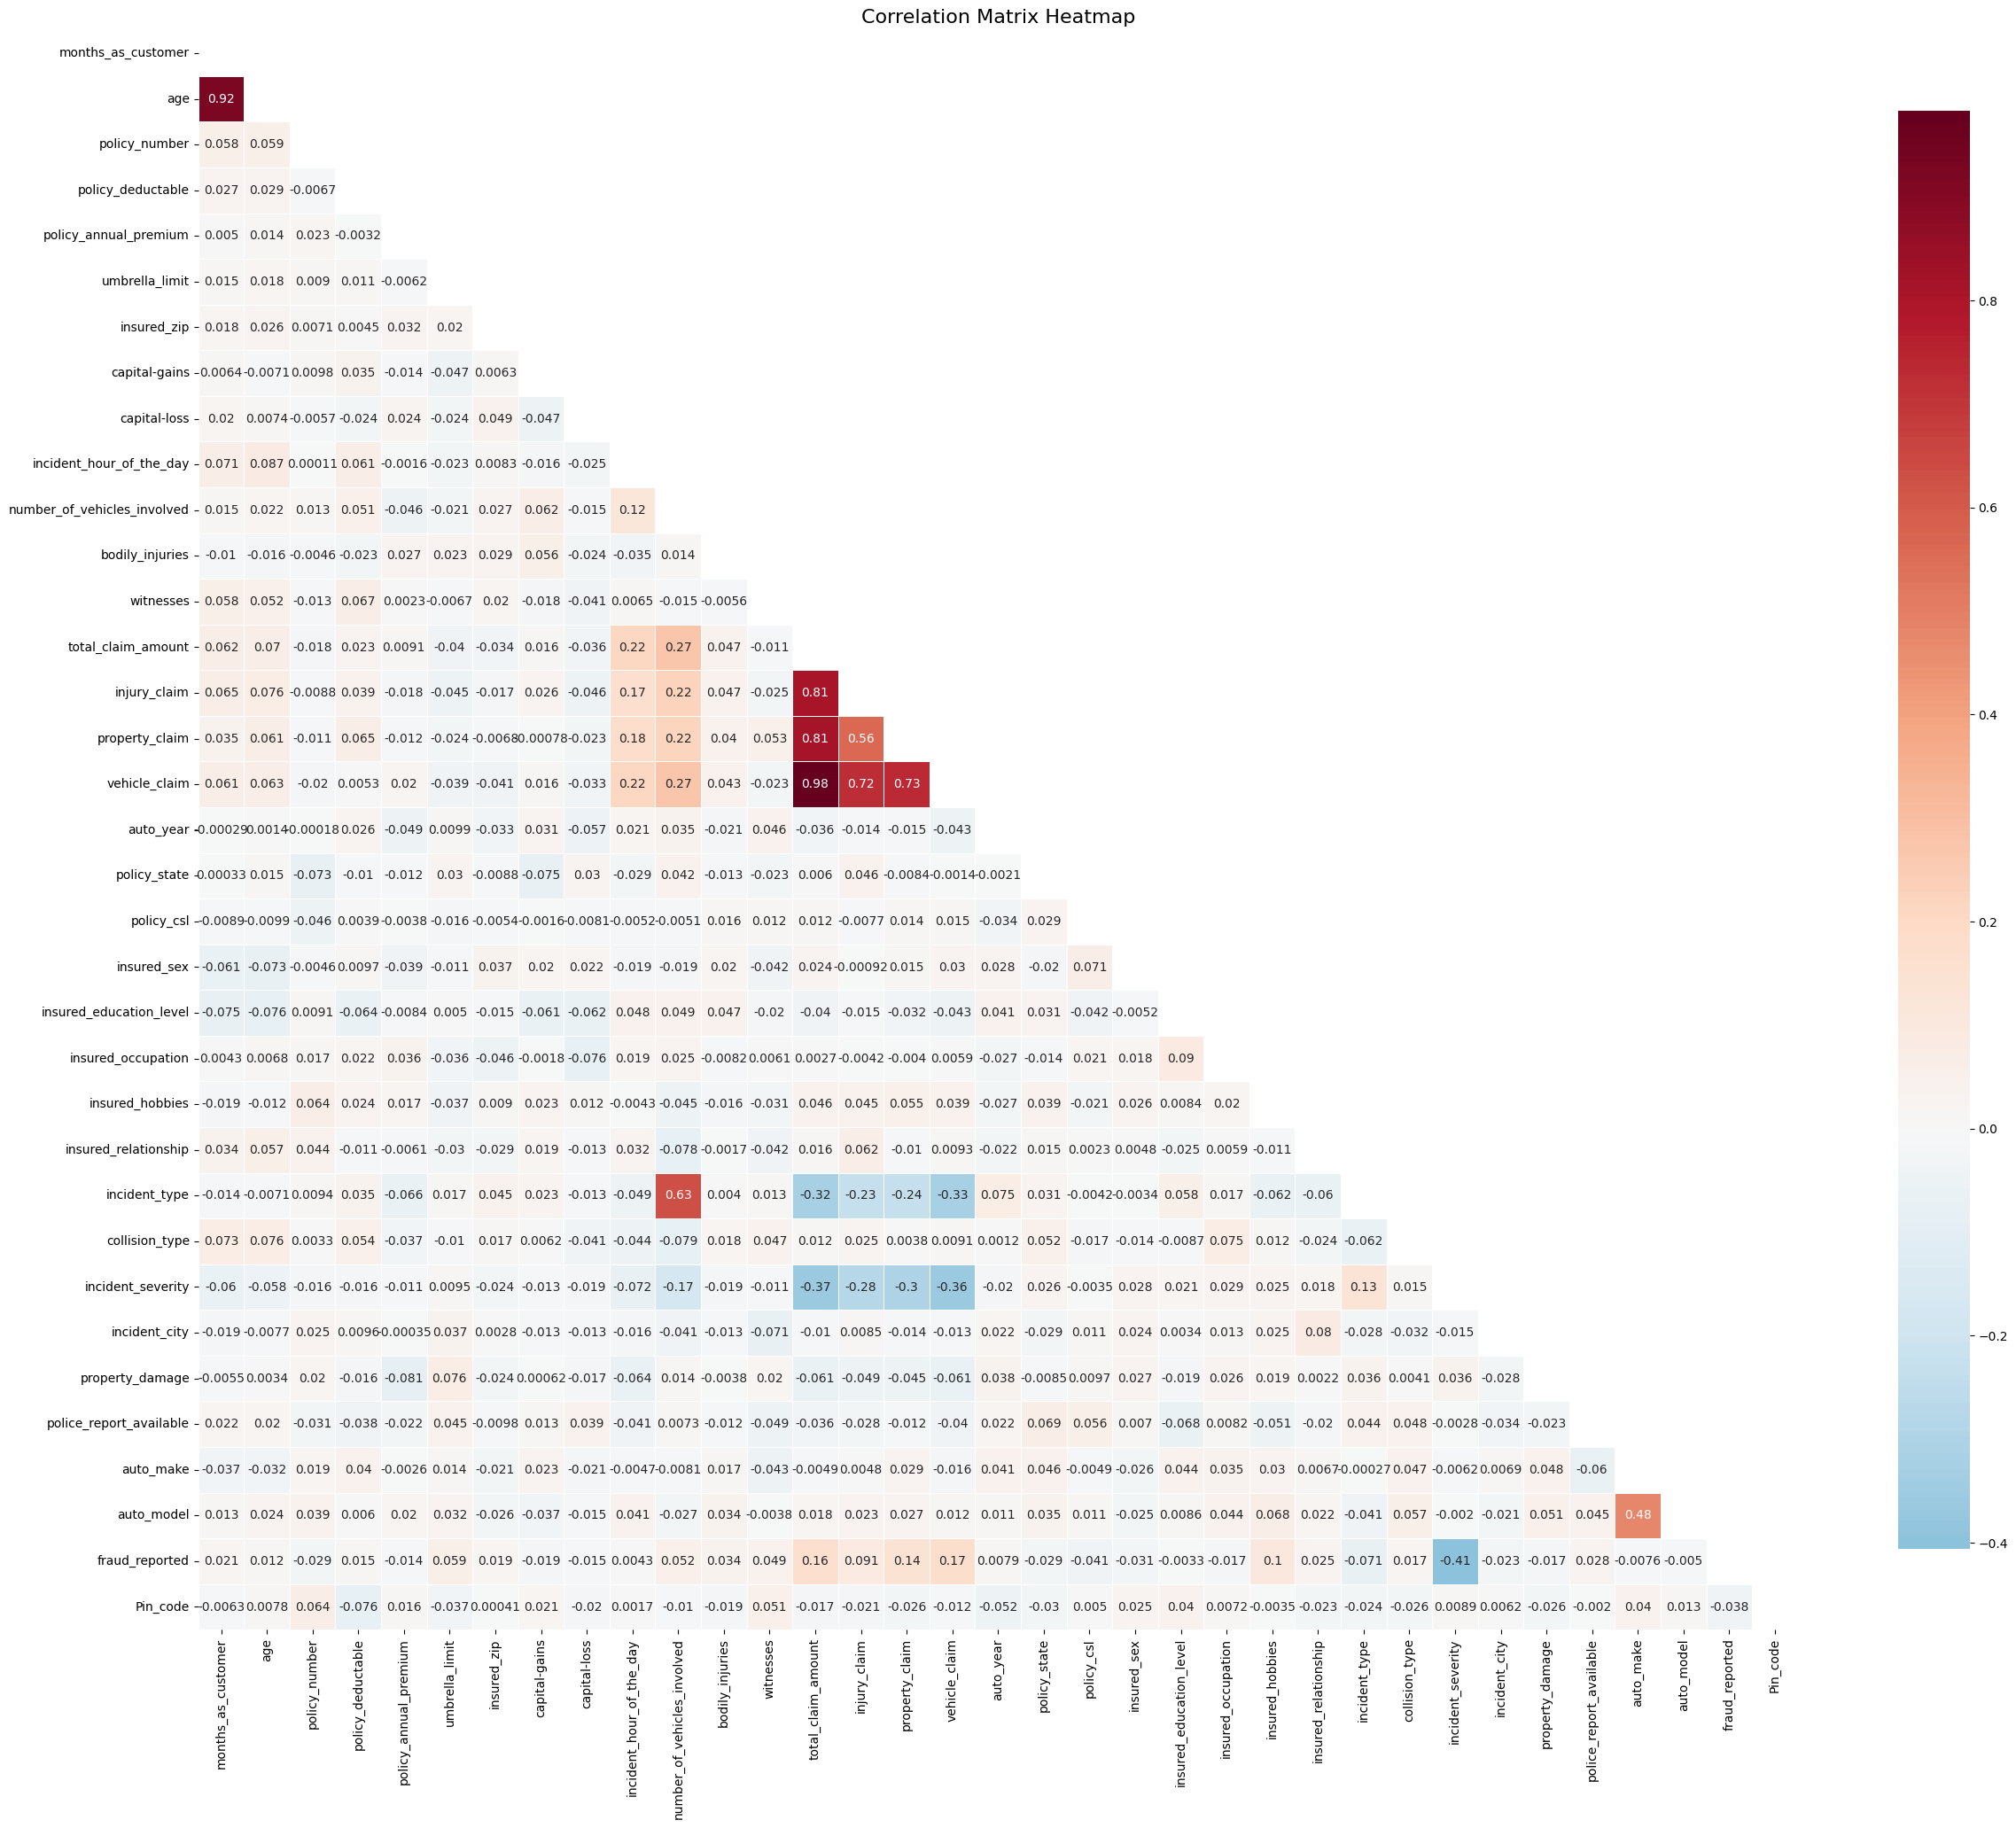

In [28]:
# Create correlation matrix
corr = all_numerical.corr()

# Create mask for upper triangle (optional - shows only lower triangle)
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(25, 22))

# Generate heatmap
sns.heatmap(corr, 
            mask=mask,           # Optional: mask upper triangle
            annot=True, 
            cmap='RdBu_r',       # Red-Blue colormap
            center=0,
            square=True,
            linewidths=0.5,      # Add lines between cells
            cbar_kws={"shrink": .8})

plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.tight_layout()
plt.show()

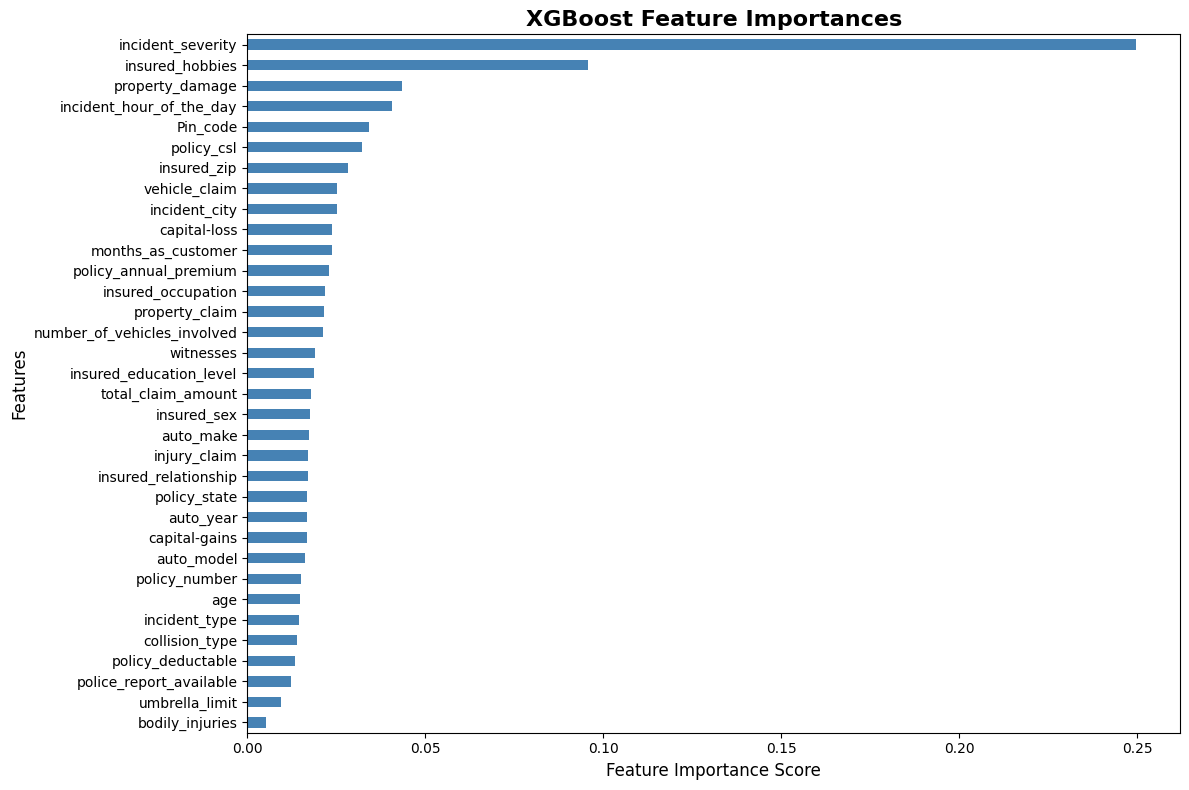

Top 10 Most Important Features:
capital-loss                0.023780
incident_city               0.025214
vehicle_claim               0.025236
insured_zip                 0.028222
policy_csl                  0.032175
Pin_code                    0.034206
incident_hour_of_the_day    0.040667
property_damage             0.043452
insured_hobbies             0.095672
incident_severity           0.249605
dtype: float32

Model Performance:
Training Accuracy: 1.0000
Testing Accuracy: 0.7950


In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

# Use original target variable from all_numerical
X = all_numerical.drop('fraud_reported', axis=1)  # scaled features
y = all_numerical['fraud_reported']  # original unscaled target

# Create train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Train XGBoost model
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)

# Create feature importance plot
fig, ax = plt.subplots(figsize=(12, 8))

feat_imp = pd.Series(
    xgb.feature_importances_, 
    index=X_train.columns
).sort_values(ascending=True)

feat_imp.plot(kind='barh', ax=ax, color='steelblue')
ax.set_title('XGBoost Feature Importances', fontsize=16, fontweight='bold')
ax.set_xlabel('Feature Importance Score', fontsize=12)
ax.set_ylabel('Features', fontsize=12)

plt.tight_layout()
plt.show()

# Print top 10 most important features
print("Top 10 Most Important Features:")
print(feat_imp.tail(10))

# Check model performance
train_score = xgb.score(X_train, y_train)
test_score = xgb.score(X_test, y_test)
print(f"\nModel Performance:")
print(f"Training Accuracy: {train_score:.4f}")
print(f"Testing Accuracy: {test_score:.4f}")

In [30]:
# Check the target variable values
print("Original target values:", all_numerical['fraud_reported'].unique())
print("Value counts:")
print(all_numerical['fraud_reported'].value_counts())

Original target values: [1 0]
Value counts:
fraud_reported
0    753
1    247
Name: count, dtype: int64


Training Accuracy: 1.0000
Testing Accuracy: 0.7800


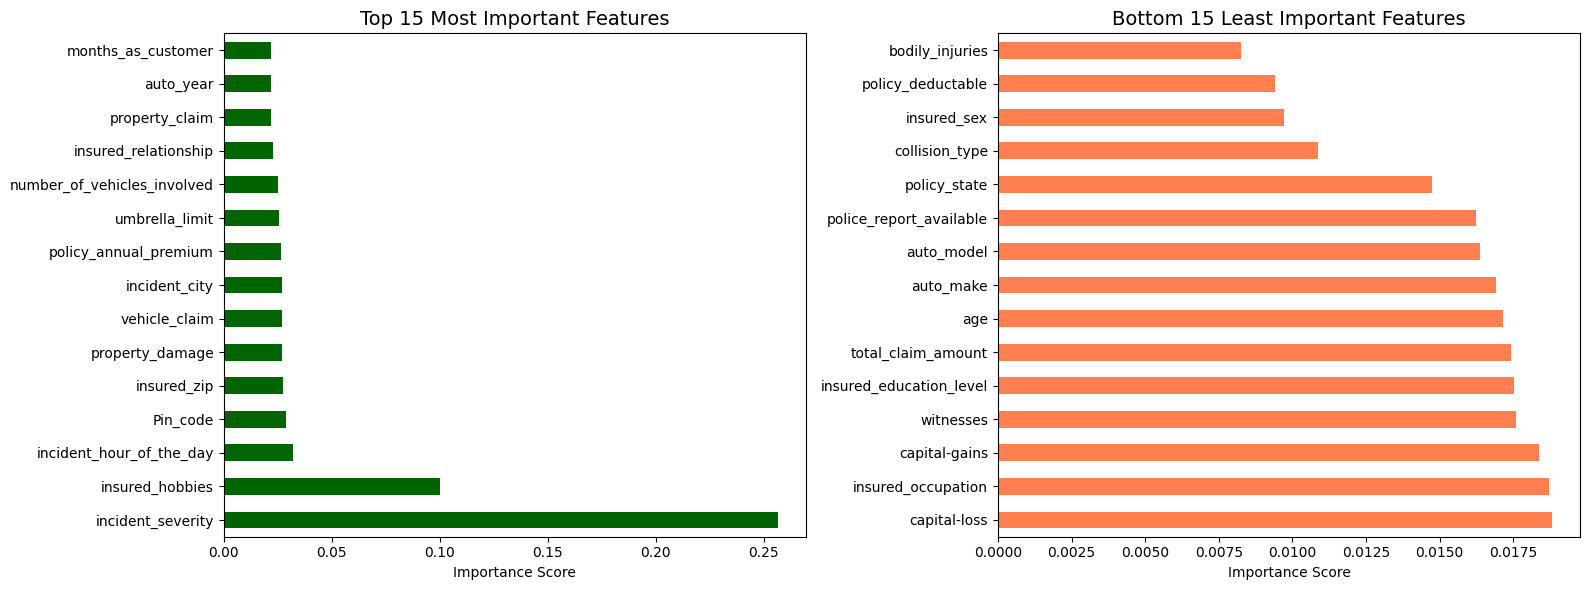


Feature Importance Summary:
Total features: 34
Mean importance: 0.0294
Std importance: 0.0428

Top 5 features account for 44.5% of total importance


In [31]:
# Train XGBoost with more parameters for better performance
xgb = XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    random_state=42,
    eval_metric='logloss'
)

xgb.fit(X_train, y_train)

# Get predictions and score
train_score = xgb.score(X_train, y_train)
test_score = xgb.score(X_test, y_test)

print(f"Training Accuracy: {train_score:.4f}")
print(f"Testing Accuracy: {test_score:.4f}")

# Feature importance analysis
feat_imp = pd.Series(
    xgb.feature_importances_, 
    index=X_train.columns
).sort_values(ascending=False)

# Create subplots for better visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Top 15 features
feat_imp.head(15).plot(kind='barh', ax=ax1, color='darkgreen')
ax1.set_title('Top 15 Most Important Features', fontsize=14)
ax1.set_xlabel('Importance Score')

# Bottom 15 features
feat_imp.tail(15).plot(kind='barh', ax=ax2, color='coral')
ax2.set_title('Bottom 15 Least Important Features', fontsize=14)
ax2.set_xlabel('Importance Score')

plt.tight_layout()
plt.show()

# Summary statistics
print(f"\nFeature Importance Summary:")
print(f"Total features: {len(feat_imp)}")
print(f"Mean importance: {feat_imp.mean():.4f}")
print(f"Std importance: {feat_imp.std():.4f}")
print(f"\nTop 5 features account for {feat_imp.head(5).sum():.1%} of total importance")

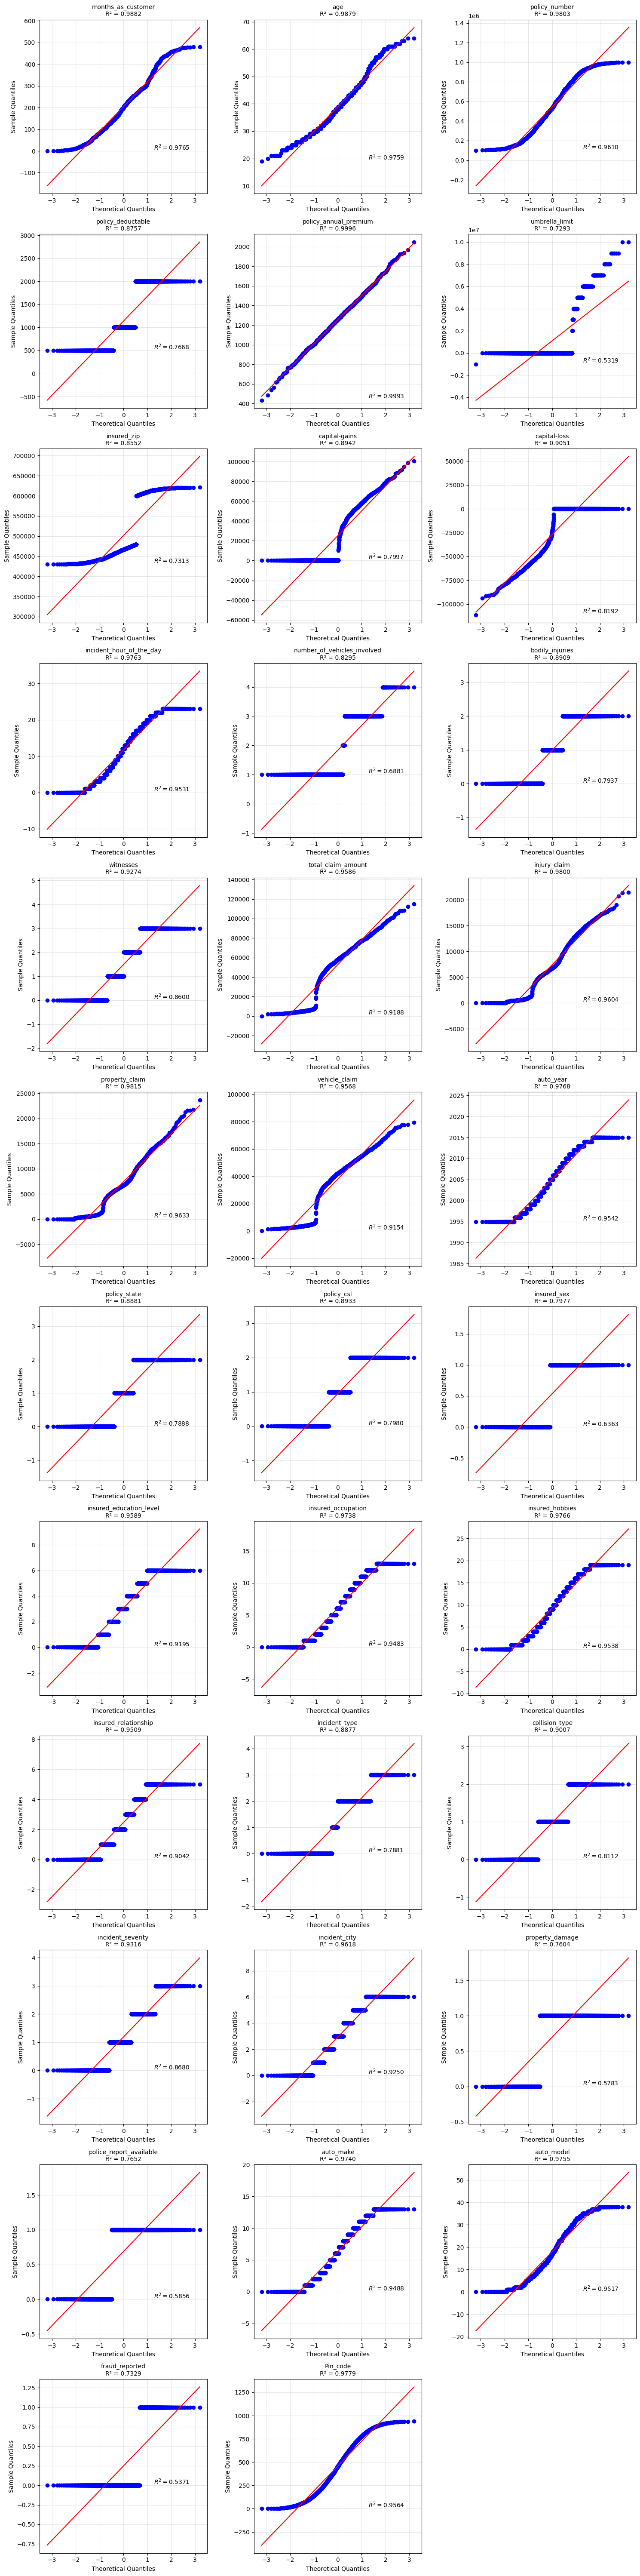


Normality Test Results Summary:
                         column  r_squared         slope     intercept  \
0            months_as_customer     0.9882  1.140139e+02  2.039540e+02   
1                           age     0.9879  9.050300e+00  3.894800e+01   
2                 policy_number     0.9803  2.525789e+05  5.462386e+05   
3             policy_deductable     0.8757  5.370225e+02  1.136000e+03   
4         policy_annual_premium     0.9996  2.446395e+02  1.256406e+03   
5                umbrella_limit     0.7293  1.679366e+06  1.101000e+06   
6                   insured_zip     0.8552  6.145619e+04  5.012145e+05   
7                 capital-gains     0.8942  2.498120e+04  2.512610e+04   
8                  capital-loss     0.9051  2.549477e+04 -2.679370e+04   
9      incident_hour_of_the_day     0.9763  6.801800e+00  1.164400e+01   
10  number_of_vehicles_involved     0.8295  8.471000e-01  1.839000e+00   
11              bodily_injuries     0.8909  7.323000e-01  9.920000e-01   
12   

In [32]:
import matplotlib.pyplot as plt
from scipy.stats import probplot
import pandas as pd
import numpy as np

# Get the list of numerical columns
numerical_columns = all_numerical.columns.tolist()
n_cols = len(numerical_columns)

# Calculate subplot dimensions (adjust as needed)
n_rows = int(np.ceil(n_cols / 3))  # 3 columns per row
n_plot_cols = min(3, n_cols)  # Max 3 columns

# Create subplots
fig, axes = plt.subplots(n_rows, n_plot_cols, figsize=(15, 5*n_rows))

# Handle case where there's only one subplot
if n_cols == 1:
    axes = [axes]
elif n_rows == 1:
    axes = axes.reshape(1, -1)

# Store results for summary
normality_results = []

# Loop through each numerical column
for i, col in enumerate(numerical_columns):
    # Calculate subplot position
    row = i // n_plot_cols
    col_pos = i % n_plot_cols
    
    # Get the appropriate axis
    if n_rows == 1:
        ax = axes[col_pos]
    else:
        ax = axes[row, col_pos]
    
    # Create probability plot
    normality_plot, stat = probplot(
        all_numerical[col].dropna(),  # Remove NaN values
        plot=ax, 
        rvalue=True
    )
    
    # Set title and labels
    ax.set_title(f'{col}\nR² = {stat[2]:.4f}', fontsize=10)
    ax.set_xlabel('Theoretical Quantiles')
    ax.set_ylabel('Sample Quantiles')
    ax.grid(True, alpha=0.3)
    
    # Store results
    normality_results.append({
        'column': col,
        'r_squared': stat[2],
        'slope': stat[0],
        'intercept': stat[1]
    })

# Hide empty subplots if any
total_subplots = n_rows * n_plot_cols
if n_cols < total_subplots:
    for i in range(n_cols, total_subplots):
        row = i // n_plot_cols
        col_pos = i % n_plot_cols
        if n_rows == 1:
            axes[col_pos].set_visible(False)
        else:
            axes[row, col_pos].set_visible(False)

plt.tight_layout()
plt.show()

# Create summary DataFrame
results_df = pd.DataFrame(normality_results)
results_df['normality_assessment'] = results_df['r_squared'].apply(
    lambda x: 'Good' if x >= 0.98 else 'Moderate' if x >= 0.95 else 'Poor'
)

print("\nNormality Test Results Summary:")
print("=" * 50)
print(results_df.round(4))

print(f"\nNormality Assessment Summary:")
print("=" * 30)
print(results_df['normality_assessment'].value_counts())

# Additional statistical tests (optional)
print(f"\nDetailed Analysis:")
print("=" * 20)
for _, row in results_df.iterrows():
    print(f"{row['column']}: R² = {row['r_squared']:.4f} ({row['normality_assessment']} normality)")

In [33]:
# Assuming your DataFrame is called all_numerical
unique_counts = all_numerical['fraud_reported'].value_counts()
print(unique_counts)


fraud_reported
0    753
1    247
Name: count, dtype: int64


In [34]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

In [35]:
all_numerical.head()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_type,collision_type,incident_severity,incident_city,property_damage,police_report_available,auto_make,auto_model,fraud_reported,Pin_code
0,328,48,521585,1000,1406.91,0,466132,53300,0,5,1,1,2,71610,6510,13020,52080,2004,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,228,42,342868,2000,1197.22,5000000,468176,0,0,8,1,0,0,5070,780,780,3510,2007,1,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1
2,134,29,687698,2000,1413.14,5000000,430632,35100,0,7,3,2,3,34650,7700,3850,23100,2007,0,1,1,1,2,2,2,2,1,1,0,1,1,2,2,0,2
3,256,41,227811,2000,1415.74,6000000,608117,48900,-62400,5,1,1,2,63400,6340,6340,50720,2014,2,0,1,1,3,2,3,0,2,0,2,1,1,3,3,1,3
4,228,44,367455,1000,1583.91,6000000,610706,66000,-46000,20,1,0,1,6500,1300,650,4550,2009,2,2,0,2,2,2,3,1,1,1,2,1,1,4,4,0,4


Missing values in features:
incident_severity           0
insured_hobbies             0
incident_hour_of_the_day    0
Pin_code                    0
insured_zip                 0
property_damage             0
vehicle_claim               0
incident_city               0
dtype: int64

Missing values in target: 0
Training set shape: (800, 8)
Test set shape: (200, 8)
Class distribution in training set:
fraud_reported
0    0.7525
1    0.2475
Name: proportion, dtype: float64

=== Training SVM with rbf kernel ===
Accuracy: 0.8200
AUC Score: 0.8302

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.89      0.88       151
           1       0.64      0.61      0.62        49

    accuracy                           0.82       200
   macro avg       0.76      0.75      0.75       200
weighted avg       0.82      0.82      0.82       200


=== Training SVM with linear kernel ===
Accuracy: 0.7550
AUC Score: 0.8205

Classification Report:
    

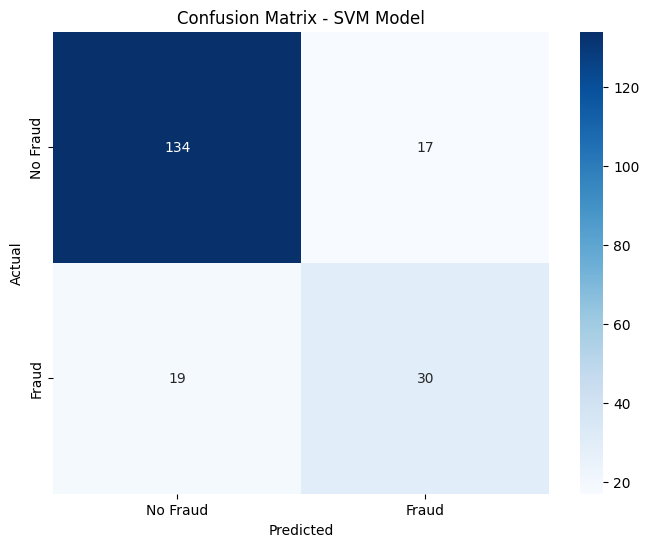

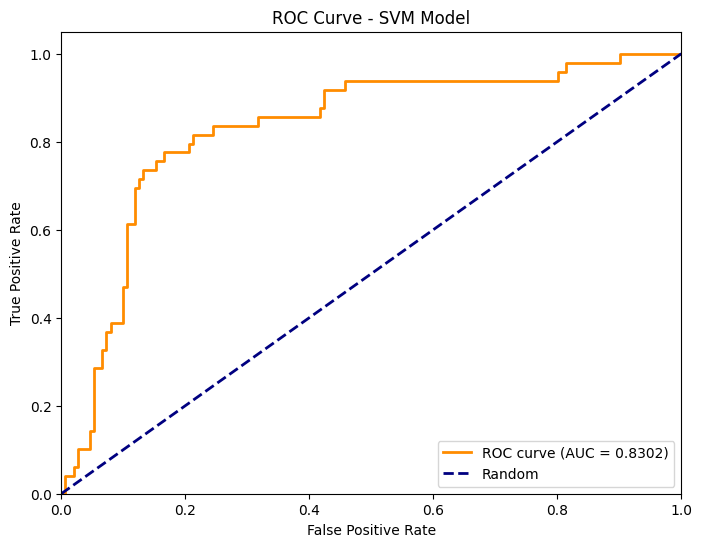


=== Cross-validation Results ===
CV AUC scores: [0.86713287 0.73913965 0.74729167 0.81375    0.78083333]
Mean CV AUC: 0.7896 (+/- 0.0938)

Model and scaler saved successfully!

=== Model Summary ===
Best Kernel: rbf
Best Parameters: {'C': 1, 'gamma': 'scale'}
Number of Features: 8
Features Used: ['incident_severity', 'insured_hobbies', 'incident_hour_of_the_day', 'Pin_code', 'insured_zip', 'property_damage', 'vehicle_claim', 'incident_city']
Final Test Accuracy: 0.8200
Final Test AUC: 0.8302


In [36]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
# Replace 'your_dataset.csv' with the actual path to your all_numerical dataset
df = all_numerical

# Define the important features based on feature importance analysis
important_features = [
    'incident_severity',
    'insured_hobbies', 
    'incident_hour_of_the_day',
    'Pin_code',
    'insured_zip',
    'property_damage',
    'vehicle_claim',
    'incident_city'
]

# Prepare the data
X = df[important_features]
y = df['fraud_reported']

# Check for missing values
print("Missing values in features:")
print(X.isnull().sum())
print(f"\nMissing values in target: {y.isnull().sum()}")

# Handle missing values if any (you can modify this based on your data)
X = X.fillna(X.median())  # Fill numeric columns with median

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale the features (important for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set shape: {X_train_scaled.shape}")
print(f"Test set shape: {X_test_scaled.shape}")
print(f"Class distribution in training set:")
print(y_train.value_counts(normalize=True))

# Initialize SVM with different kernels to try
svm_models = {
    'rbf': SVC(kernel='rbf', probability=True, random_state=42),
    'linear': SVC(kernel='linear', probability=True, random_state=42),
    'poly': SVC(kernel='poly', degree=3, probability=True, random_state=42)
}

# Train and evaluate each kernel
results = {}
for kernel_name, model in svm_models.items():
    print(f"\n=== Training SVM with {kernel_name} kernel ===")
    
    # Train the model
    model.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_pred_proba)
    
    # Store results
    results[kernel_name] = {
        'model': model,
        'accuracy': accuracy,
        'auc': auc_score,
        'predictions': y_pred,
        'probabilities': y_pred_proba
    }
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"AUC Score: {auc_score:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

# Find the best model
best_kernel = max(results.keys(), key=lambda k: results[k]['auc'])
best_model = results[best_kernel]['model']
print(f"\n=== Best performing kernel: {best_kernel} ===")
print(f"Best AUC Score: {results[best_kernel]['auc']:.4f}")

# Hyperparameter tuning for the best kernel
print(f"\n=== Hyperparameter tuning for {best_kernel} kernel ===")

if best_kernel == 'rbf':
    param_grid = {
        'C': [0.1, 1, 10, 100],
        'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1]
    }
elif best_kernel == 'linear':
    param_grid = {
        'C': [0.1, 1, 10, 100, 1000]
    }
else:  # poly
    param_grid = {
        'C': [0.1, 1, 10, 100],
        'degree': [2, 3, 4],
        'gamma': ['scale', 'auto', 0.001, 0.01, 0.1]
    }

# Grid search
grid_search = GridSearchCV(
    SVC(kernel=best_kernel, probability=True, random_state=42),
    param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_scaled, y_train)

# Best model after tuning
best_tuned_model = grid_search.best_estimator_
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation AUC: {grid_search.best_score_:.4f}")

# Final evaluation
y_pred_final = best_tuned_model.predict(X_test_scaled)
y_pred_proba_final = best_tuned_model.predict_proba(X_test_scaled)[:, 1]

final_accuracy = accuracy_score(y_test, y_pred_final)
final_auc = roc_auc_score(y_test, y_pred_proba_final)

print(f"\n=== Final Model Performance ===")
print(f"Final Accuracy: {final_accuracy:.4f}")
print(f"Final AUC Score: {final_auc:.4f}")
print("\nFinal Classification Report:")
print(classification_report(y_test, y_pred_final))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_final)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Fraud', 'Fraud'], 
            yticklabels=['No Fraud', 'Fraud'])
plt.title('Confusion Matrix - SVM Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_final)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {final_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVM Model')
plt.legend(loc="lower right")
plt.show()

# Feature importance (for linear kernel only)
if best_kernel == 'linear':
    feature_importance = abs(best_tuned_model.coef_[0])
    feature_names = important_features
    
    plt.figure(figsize=(10, 6))
    indices = np.argsort(feature_importance)[::-1]
    plt.bar(range(len(feature_importance)), feature_importance[indices])
    plt.xticks(range(len(feature_importance)), [feature_names[i] for i in indices], rotation=45)
    plt.title('Feature Importance (Linear SVM)')
    plt.tight_layout()
    plt.show()

# Cross-validation scores
cv_scores = cross_val_score(best_tuned_model, X_train_scaled, y_train, cv=5, scoring='roc_auc')
print(f"\n=== Cross-validation Results ===")
print(f"CV AUC scores: {cv_scores}")
print(f"Mean CV AUC: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

# Save the model and scaler (optional)
import joblib
joblib.dump(best_tuned_model, 'fraud_detection_svm_model.pkl')
joblib.dump(scaler, 'fraud_detection_scaler.pkl')
print("\nModel and scaler saved successfully!")

print("\n=== Model Summary ===")
print(f"Best Kernel: {best_kernel}")
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Number of Features: {len(important_features)}")
print(f"Features Used: {important_features}")
print(f"Final Test Accuracy: {final_accuracy:.4f}")
print(f"Final Test AUC: {final_auc:.4f}")

Missing values in features:
incident_severity           0
insured_hobbies             0
incident_hour_of_the_day    0
Pin_code                    0
insured_zip                 0
property_damage             0
vehicle_claim               0
incident_city               0
dtype: int64

Missing values in target: 0
Training set shape: (800, 8)
Test set shape: (200, 8)
Class distribution in training set:
fraud_reported
0    0.7525
1    0.2475
Name: proportion, dtype: float64
Scale pos weight: 3.04

=== Training Initial XGBoost Model ===
Initial Accuracy: 0.8000
Initial AUC Score: 0.8357

Initial Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.87      0.87       151
           1       0.60      0.57      0.58        49

    accuracy                           0.80       200
   macro avg       0.73      0.72      0.73       200
weighted avg       0.80      0.80      0.80       200


=== Hyperparameter Tuning ===
Fitting 5 folds for each

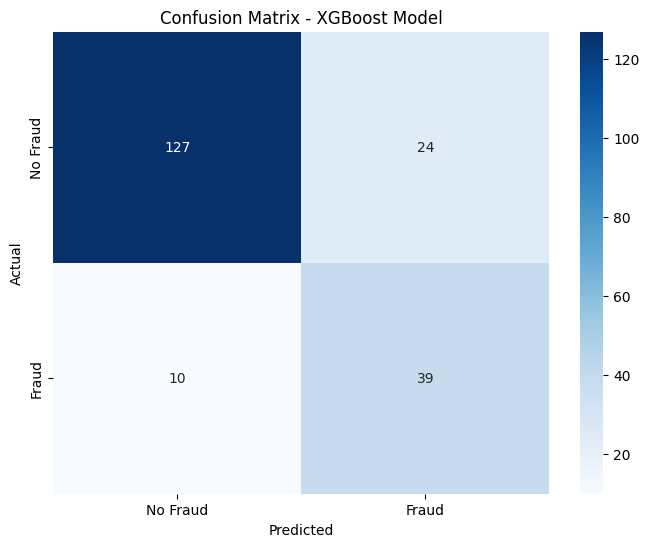

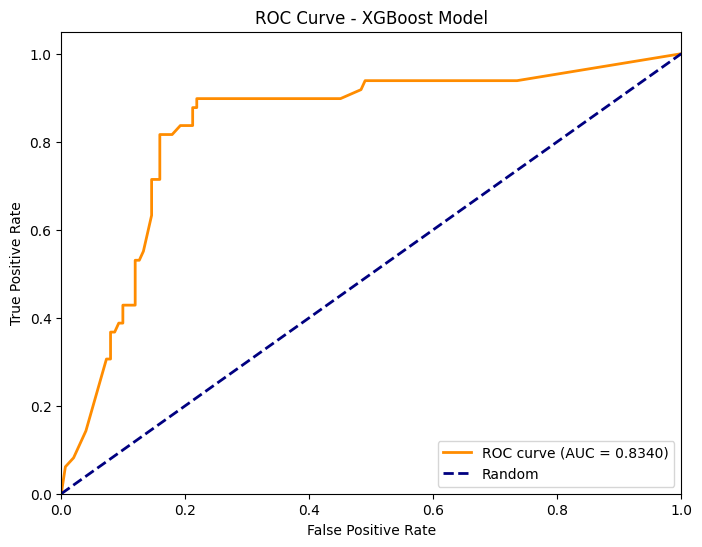

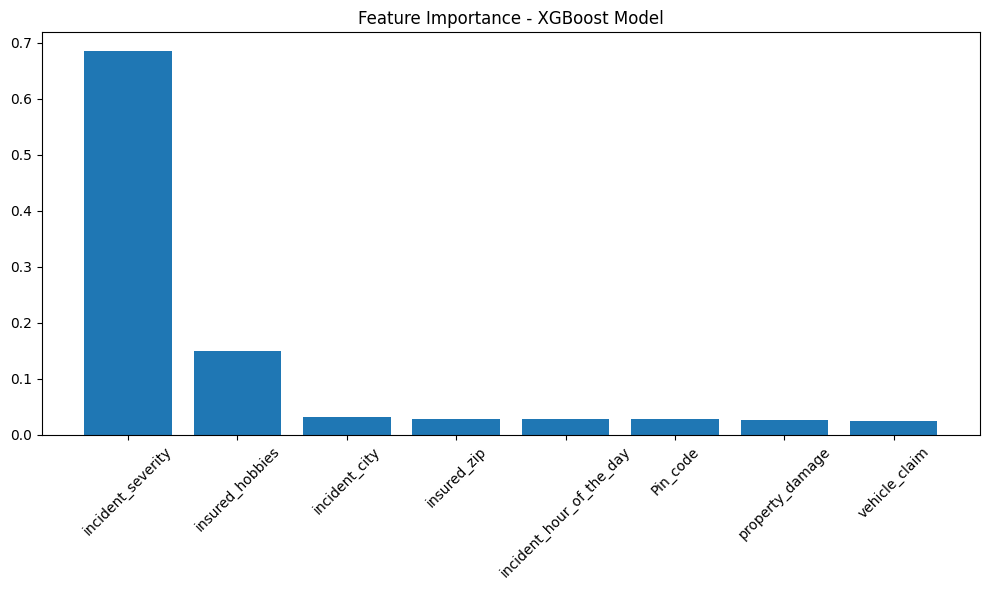


=== Feature Importance Rankings ===
incident_severity: 0.6844
insured_hobbies: 0.1489
incident_city: 0.0316
insured_zip: 0.0286
incident_hour_of_the_day: 0.0276
Pin_code: 0.0276
property_damage: 0.0272
vehicle_claim: 0.0240

=== Cross-validation Results ===
CV AUC scores: [0.92318288 0.88578089 0.91072917 0.92541667 0.89677083]
Mean CV AUC: 0.9084 (+/- 0.0305)

=== Training Learning Curves ===


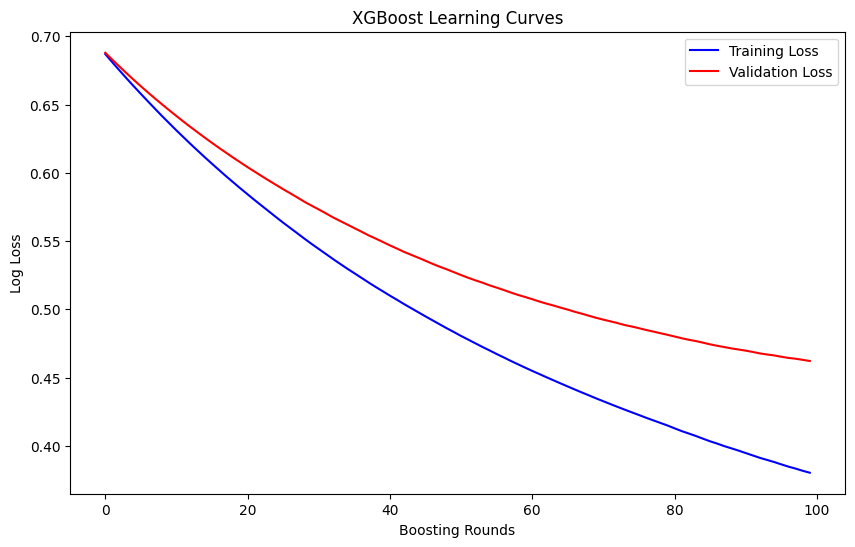

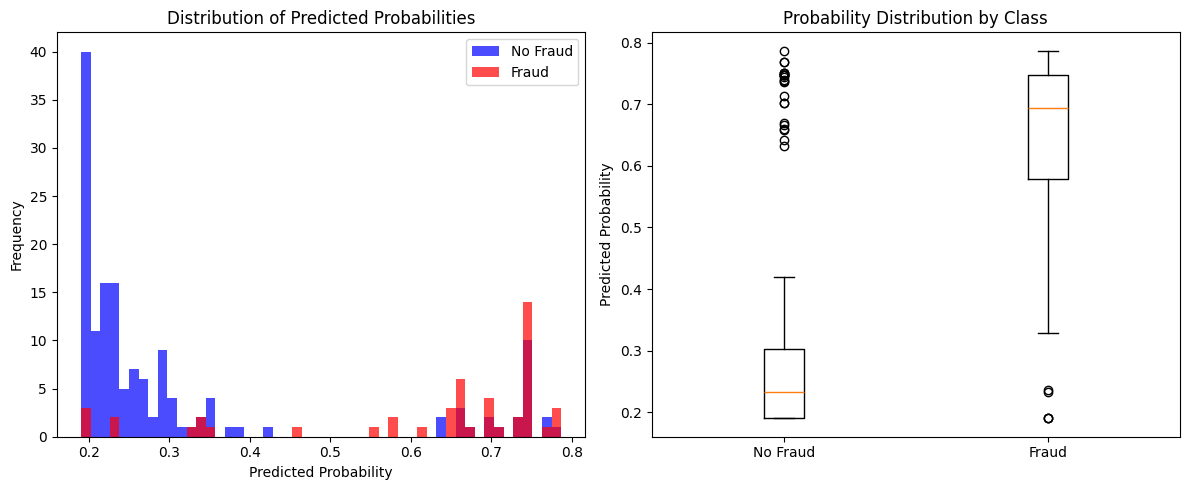


XGBoost model saved successfully!

=== XGBoost Model Summary ===
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 100, 'subsample': 1.0}
Number of Features: 8
Features Used: ['incident_severity', 'insured_hobbies', 'incident_hour_of_the_day', 'Pin_code', 'insured_zip', 'property_damage', 'vehicle_claim', 'incident_city']
Final Test Accuracy: 0.8300
Final Test AUC: 0.8340
Class Balance (scale_pos_weight): 3.04

=== Additional Metrics ===
Precision: 0.6190
Recall: 0.7959
F1-Score: 0.6964

=== Threshold Optimization ===
Threshold 0.1: F1-Score = 0.3936
Threshold 0.2: F1-Score = 0.4466
Threshold 0.3: F1-Score = 0.6667
Threshold 0.4: F1-Score = 0.7018
Threshold 0.5: F1-Score = 0.6964
Threshold 0.6: F1-Score = 0.6606
Threshold 0.7: F1-Score = 0.4944
Threshold 0.8: F1-Score = 0.0000

Best threshold: 0.4 with F1-Score: 0.7018


In [37]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
# Replace 'your_dataset.csv' with the actual path to your all_numerical dataset
df = all_numerical

# Define the important features based on feature importance analysis
important_features = [
    'incident_severity',
    'insured_hobbies', 
    'incident_hour_of_the_day',
    'Pin_code',
    'insured_zip',
    'property_damage',
    'vehicle_claim',
    'incident_city'
]

# Prepare the data
X = df[important_features]
y = df['fraud_reported']

# Check for missing values
print("Missing values in features:")
print(X.isnull().sum())
print(f"\nMissing values in target: {y.isnull().sum()}")

# Handle missing values if any
X = X.fillna(X.median())  # Fill numeric columns with median

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")
print(f"Class distribution in training set:")
print(y_train.value_counts(normalize=True))

# Calculate class weights for imbalanced dataset
class_counts = y_train.value_counts()
scale_pos_weight = class_counts[0] / class_counts[1] if len(class_counts) > 1 else 1
print(f"Scale pos weight: {scale_pos_weight:.2f}")

# Initialize XGBoost classifier
xgb_model = xgb.XGBClassifier(
    random_state=42,
    scale_pos_weight=scale_pos_weight,
    eval_metric='logloss'
)

# Train the initial model
print("\n=== Training Initial XGBoost Model ===")
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]

# Calculate initial metrics
initial_accuracy = accuracy_score(y_test, y_pred)
initial_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Initial Accuracy: {initial_accuracy:.4f}")
print(f"Initial AUC Score: {initial_auc:.4f}")
print("\nInitial Classification Report:")
print(classification_report(y_test, y_pred))

# Hyperparameter tuning
print("\n=== Hyperparameter Tuning ===")

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Grid search with cross-validation
grid_search = GridSearchCV(
    xgb.XGBClassifier(
        random_state=42,
        scale_pos_weight=scale_pos_weight,
        eval_metric='logloss'
    ),
    param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

# Best model after tuning
best_xgb_model = grid_search.best_estimator_
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation AUC: {grid_search.best_score_:.4f}")

# Final evaluation
y_pred_final = best_xgb_model.predict(X_test)
y_pred_proba_final = best_xgb_model.predict_proba(X_test)[:, 1]

final_accuracy = accuracy_score(y_test, y_pred_final)
final_auc = roc_auc_score(y_test, y_pred_proba_final)

print(f"\n=== Final Model Performance ===")
print(f"Final Accuracy: {final_accuracy:.4f}")
print(f"Final AUC Score: {final_auc:.4f}")
print("\nFinal Classification Report:")
print(classification_report(y_test, y_pred_final))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_final)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Fraud', 'Fraud'], 
            yticklabels=['No Fraud', 'Fraud'])
plt.title('Confusion Matrix - XGBoost Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_final)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {final_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost Model')
plt.legend(loc="lower right")
plt.show()

# Feature Importance from XGBoost
feature_importance = best_xgb_model.feature_importances_
feature_names = important_features

plt.figure(figsize=(10, 6))
indices = np.argsort(feature_importance)[::-1]
plt.bar(range(len(feature_importance)), feature_importance[indices])
plt.xticks(range(len(feature_importance)), [feature_names[i] for i in indices], rotation=45)
plt.title('Feature Importance - XGBoost Model')
plt.tight_layout()
plt.show()

# Print feature importance values
print("\n=== Feature Importance Rankings ===")
feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importance
}).sort_values('importance', ascending=False)

for idx, row in feature_importance_df.iterrows():
    print(f"{row['feature']}: {row['importance']:.4f}")

# Cross-validation scores
cv_scores = cross_val_score(best_xgb_model, X_train, y_train, cv=5, scoring='roc_auc')
print(f"\n=== Cross-validation Results ===")
print(f"CV AUC scores: {cv_scores}")
print(f"Mean CV AUC: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

# Learning curves
print("\n=== Training Learning Curves ===")
eval_set = [(X_train, y_train), (X_test, y_test)]
best_xgb_model.fit(X_train, y_train, eval_set=eval_set, verbose=False)

# Get evaluation results
results = best_xgb_model.evals_result()
train_logloss = results['validation_0']['logloss']
val_logloss = results['validation_1']['logloss']

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.plot(range(len(train_logloss)), train_logloss, label='Training Loss', color='blue')
plt.plot(range(len(val_logloss)), val_logloss, label='Validation Loss', color='red')
plt.xlabel('Boosting Rounds')
plt.ylabel('Log Loss')
plt.title('XGBoost Learning Curves')
plt.legend()
plt.show()

# Prediction probabilities distribution
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(y_pred_proba_final[y_test == 0], bins=50, alpha=0.7, label='No Fraud', color='blue')
plt.hist(y_pred_proba_final[y_test == 1], bins=50, alpha=0.7, label='Fraud', color='red')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Probabilities')
plt.legend()

plt.subplot(1, 2, 2)
plt.boxplot([y_pred_proba_final[y_test == 0], y_pred_proba_final[y_test == 1]], 
            labels=['No Fraud', 'Fraud'])
plt.ylabel('Predicted Probability')
plt.title('Probability Distribution by Class')
plt.tight_layout()
plt.show()

# Save the model
import joblib
joblib.dump(best_xgb_model, 'fraud_detection_xgboost_model.pkl')
print("\nXGBoost model saved successfully!")

# Model summary
print("\n=== XGBoost Model Summary ===")
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Number of Features: {len(important_features)}")
print(f"Features Used: {important_features}")
print(f"Final Test Accuracy: {final_accuracy:.4f}")
print(f"Final Test AUC: {final_auc:.4f}")
print(f"Class Balance (scale_pos_weight): {scale_pos_weight:.2f}")

# Additional metrics
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred_final)
recall = recall_score(y_test, y_pred_final)
f1 = f1_score(y_test, y_pred_final)

print(f"\n=== Additional Metrics ===")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Threshold optimization (optional)
print("\n=== Threshold Optimization ===")
thresholds = np.arange(0.1, 0.9, 0.1)
best_threshold = 0.5
best_f1 = 0

for threshold in thresholds:
    y_pred_thresh = (y_pred_proba_final >= threshold).astype(int)
    f1_thresh = f1_score(y_test, y_pred_thresh)
    print(f"Threshold {threshold:.1f}: F1-Score = {f1_thresh:.4f}")
    
    if f1_thresh > best_f1:
        best_f1 = f1_thresh
        best_threshold = threshold

print(f"\nBest threshold: {best_threshold:.1f} with F1-Score: {best_f1:.4f}")

Missing values in features:
incident_severity           0
insured_hobbies             0
incident_hour_of_the_day    0
Pin_code                    0
insured_zip                 0
property_damage             0
vehicle_claim               0
incident_city               0
dtype: int64

Missing values in target: 0
Training set shape: (800, 8)
Test set shape: (200, 8)
Class distribution in training set:
fraud_reported
0    0.7525
1    0.2475
Name: proportion, dtype: float64
Scale pos weight: 3.04

=== Training Initial CatBoost Model ===
Initial Accuracy: 0.8250
Initial AUC Score: 0.8424

Initial Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.85      0.88       151
           1       0.62      0.76      0.68        49

    accuracy                           0.82       200
   macro avg       0.77      0.80      0.78       200
weighted avg       0.84      0.82      0.83       200


=== Hyperparameter Tuning ===
Fitting 5 folds for eac

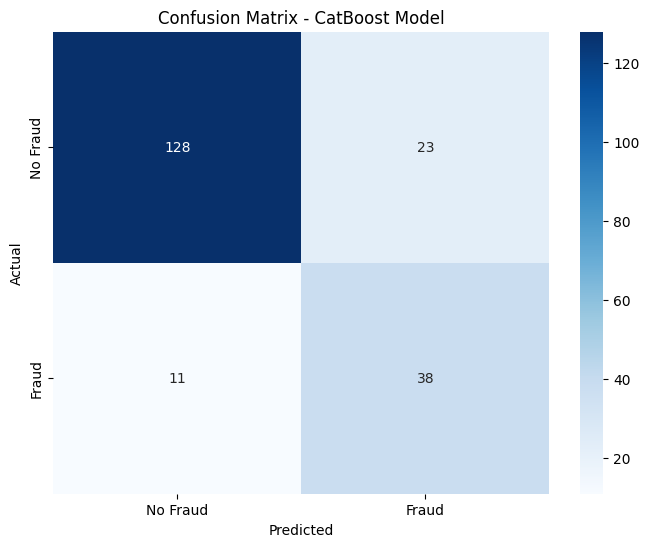

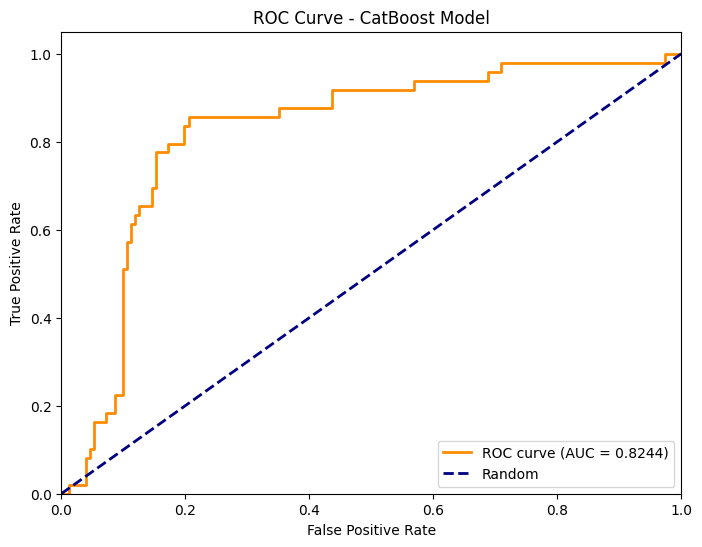

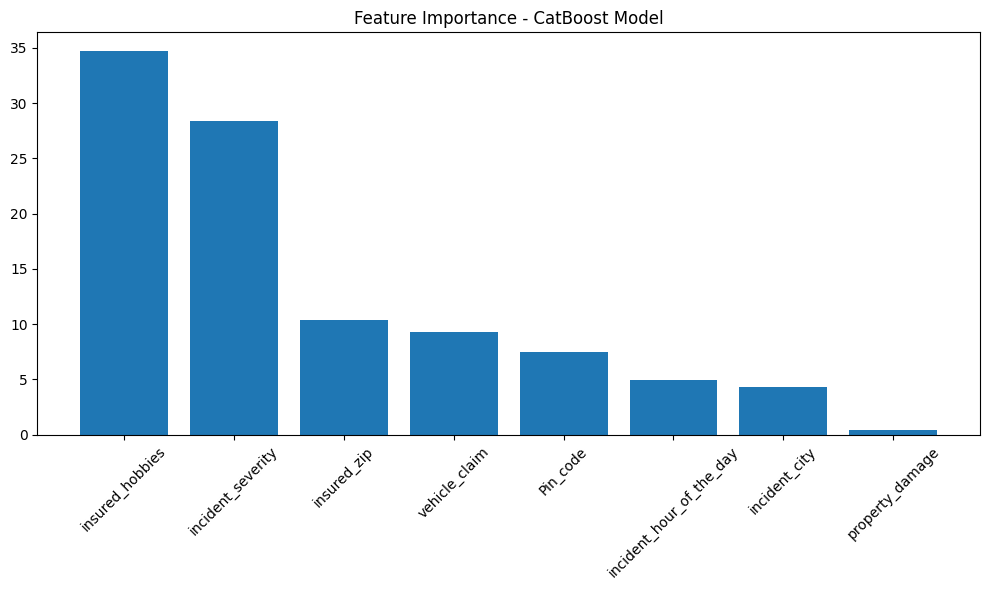


=== Feature Importance Rankings ===
insured_hobbies: 34.6691
incident_severity: 28.3572
insured_zip: 10.4146
vehicle_claim: 9.3273
Pin_code: 7.4992
incident_hour_of_the_day: 4.9829
incident_city: 4.3427
property_damage: 0.4072

=== Cross-validation Results ===
CV AUC scores: [0.91481246 0.87963552 0.87375    0.88479167 0.87645833]
Mean CV AUC: 0.8859 (+/- 0.0298)


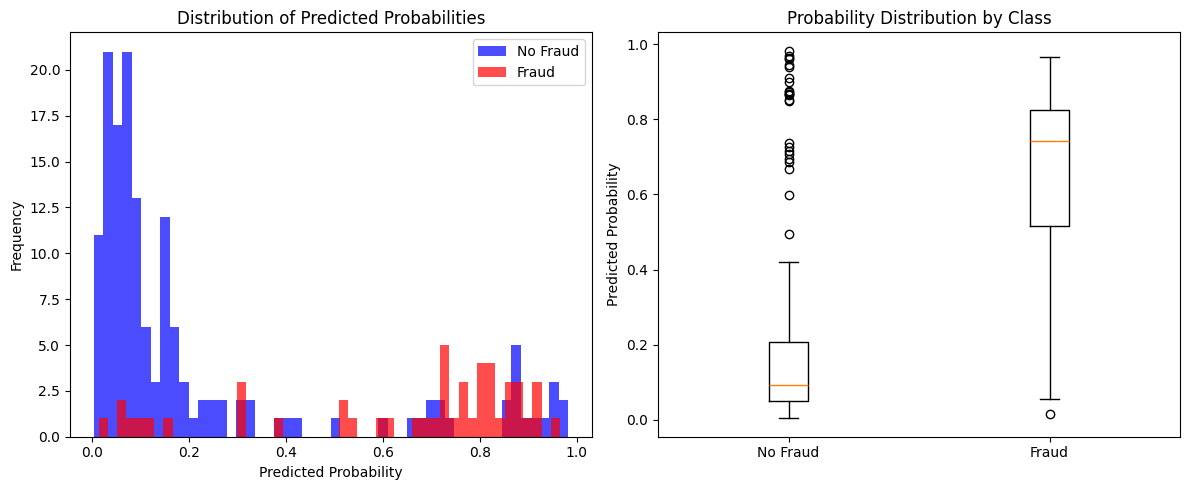


=== Threshold Optimization ===
Threshold 0.1: F1-Score = 0.5556
Threshold 0.2: F1-Score = 0.6512
Threshold 0.3: F1-Score = 0.6777
Threshold 0.4: F1-Score = 0.6726
Threshold 0.5: F1-Score = 0.6909
Threshold 0.6: F1-Score = 0.6476
Threshold 0.7: F1-Score = 0.6263
Threshold 0.8: F1-Score = 0.4390

Best threshold: 0.5 with F1-Score: 0.6909

=== CatBoost Feature Interactions ===
Top feature interactions found by CatBoost:
Feature interactions not available in this CatBoost version

CatBoost model saved successfully!

=== CatBoost Model Summary ===
Best Parameters: {'depth': 4, 'iterations': 100, 'l2_leaf_reg': 1, 'learning_rate': 0.2}
Number of Features: 8
Features Used: ['incident_severity', 'insured_hobbies', 'incident_hour_of_the_day', 'Pin_code', 'insured_zip', 'property_damage', 'vehicle_claim', 'incident_city']
Final Test Accuracy: 0.8300
Final Test AUC: 0.8244
Final Test Precision: 0.6230
Final Test Recall: 0.7755
Final Test F1-Score: 0.6909
Class Balance (scale_pos_weight): 3.04
Be

In [41]:
import pandas as pd
import numpy as np
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
# Replace 'your_dataset.csv' with the actual path to your all_numerical dataset
df = all_numerical

# Define the important features based on feature importance analysis
important_features = [
    'incident_severity',
    'insured_hobbies', 
    'incident_hour_of_the_day',
    'Pin_code',
    'insured_zip',
    'property_damage',
    'vehicle_claim',
    'incident_city'
]

# Prepare the data
X = df[important_features]
y = df['fraud_reported']

# Check for missing values
print("Missing values in features:")
print(X.isnull().sum())
print(f"\nMissing values in target: {y.isnull().sum()}")

# Handle missing values if any
X = X.fillna(X.median())  # CatBoost can handle missing values, but let's fill them

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")
print(f"Class distribution in training set:")
print(y_train.value_counts(normalize=True))

# Calculate class weights for imbalanced dataset
class_counts = y_train.value_counts()
scale_pos_weight = class_counts[0] / class_counts[1] if len(class_counts) > 1 else 1
print(f"Scale pos weight: {scale_pos_weight:.2f}")

# Initialize CatBoost classifier
catboost_model = CatBoostClassifier(
    random_state=42,
    verbose=False,  # Set to True if you want to see training progress
    scale_pos_weight=scale_pos_weight,
    eval_metric='AUC'
)

# Train the initial model
print("\n=== Training Initial CatBoost Model ===")
catboost_model.fit(X_train, y_train)

# Make predictions
y_pred = catboost_model.predict(X_test)
y_pred_proba = catboost_model.predict_proba(X_test)[:, 1]

# Calculate initial metrics
initial_accuracy = accuracy_score(y_test, y_pred)
initial_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Initial Accuracy: {initial_accuracy:.4f}")
print(f"Initial AUC Score: {initial_auc:.4f}")
print("\nInitial Classification Report:")
print(classification_report(y_test, y_pred))

# Hyperparameter tuning
print("\n=== Hyperparameter Tuning ===")

# Define parameter grid for CatBoost
param_grid = {
    'iterations': [100, 200, 300],
    'depth': [4, 6, 8],
    'learning_rate': [0.01, 0.1, 0.2],
    'l2_leaf_reg': [1, 3, 5]
}

# Grid search with cross-validation
grid_search = GridSearchCV(
    CatBoostClassifier(
        random_state=42,
        verbose=False,
        scale_pos_weight=scale_pos_weight,
        eval_metric='AUC'
    ),
    param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

# Best model after tuning
best_catboost_model = grid_search.best_estimator_
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation AUC: {grid_search.best_score_:.4f}")

# Final evaluation
y_pred_final = best_catboost_model.predict(X_test)
y_pred_proba_final = best_catboost_model.predict_proba(X_test)[:, 1]

final_accuracy = accuracy_score(y_test, y_pred_final)
final_auc = roc_auc_score(y_test, y_pred_proba_final)

print(f"\n=== Final Model Performance ===")
print(f"Final Accuracy: {final_accuracy:.4f}")
print(f"Final AUC Score: {final_auc:.4f}")
print("\nFinal Classification Report:")
print(classification_report(y_test, y_pred_final))

# Additional metrics
precision = precision_score(y_test, y_pred_final)
recall = recall_score(y_test, y_pred_final)
f1 = f1_score(y_test, y_pred_final)

print(f"\n=== Additional Metrics ===")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_final)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Fraud', 'Fraud'], 
            yticklabels=['No Fraud', 'Fraud'])
plt.title('Confusion Matrix - CatBoost Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_final)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {final_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - CatBoost Model')
plt.legend(loc="lower right")
plt.show()

# Feature Importance from CatBoost
feature_importance = best_catboost_model.feature_importances_
feature_names = important_features

plt.figure(figsize=(10, 6))
indices = np.argsort(feature_importance)[::-1]
plt.bar(range(len(feature_importance)), feature_importance[indices])
plt.xticks(range(len(feature_importance)), [feature_names[i] for i in indices], rotation=45)
plt.title('Feature Importance - CatBoost Model')
plt.tight_layout()
plt.show()

# Print feature importance values
print("\n=== Feature Importance Rankings ===")
feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importance
}).sort_values('importance', ascending=False)

for idx, row in feature_importance_df.iterrows():
    print(f"{row['feature']}: {row['importance']:.4f}")

# Cross-validation scores
cv_scores = cross_val_score(best_catboost_model, X_train, y_train, cv=5, scoring='roc_auc')
print(f"\n=== Cross-validation Results ===")
print(f"CV AUC scores: {cv_scores}")
print(f"Mean CV AUC: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

# Prediction probabilities distribution
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(y_pred_proba_final[y_test == 0], bins=50, alpha=0.7, label='No Fraud', color='blue')
plt.hist(y_pred_proba_final[y_test == 1], bins=50, alpha=0.7, label='Fraud', color='red')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Probabilities')
plt.legend()

plt.subplot(1, 2, 2)
plt.boxplot([y_pred_proba_final[y_test == 0], y_pred_proba_final[y_test == 1]], 
            labels=['No Fraud', 'Fraud'])
plt.ylabel('Predicted Probability')
plt.title('Probability Distribution by Class')
plt.tight_layout()
plt.show()

# Threshold optimization
print("\n=== Threshold Optimization ===")
thresholds = np.arange(0.1, 0.9, 0.1)
best_threshold = 0.5
best_f1 = 0

for threshold in thresholds:
    y_pred_thresh = (y_pred_proba_final >= threshold).astype(int)
    f1_thresh = f1_score(y_test, y_pred_thresh)
    print(f"Threshold {threshold:.1f}: F1-Score = {f1_thresh:.4f}")
    
    if f1_thresh > best_f1:
        best_f1 = f1_thresh
        best_threshold = threshold

print(f"\nBest threshold: {best_threshold:.1f} with F1-Score: {best_f1:.4f}")

# CatBoost specific: Get feature interactions (if available)
try:
    print("\n=== CatBoost Feature Interactions ===")
    feature_interactions = best_catboost_model.get_feature_importance(type='Interaction')
    if len(feature_interactions) > 0:
        print("Top feature interactions found by CatBoost:")
        for i, interaction in enumerate(feature_interactions[:5]):
            print(f"Interaction {i+1}: {interaction:.4f}")
except:
    print("Feature interactions not available in this CatBoost version")

# Save the model
import joblib
joblib.dump(best_catboost_model, 'fraud_detection_catboost_model.pkl')
print("\nCatBoost model saved successfully!")

# Model summary
print("\n=== CatBoost Model Summary ===")
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Number of Features: {len(important_features)}")
print(f"Features Used: {important_features}")
print(f"Final Test Accuracy: {final_accuracy:.4f}")
print(f"Final Test AUC: {final_auc:.4f}")
print(f"Final Test Precision: {precision:.4f}")
print(f"Final Test Recall: {recall:.4f}")
print(f"Final Test F1-Score: {f1:.4f}")
print(f"Class Balance (scale_pos_weight): {scale_pos_weight:.2f}")
print(f"Best Decision Threshold: {best_threshold:.1f}")

# Performance comparison with different metrics
print("\n=== Performance at Different Thresholds ===")
thresholds_detailed = [0.3, 0.4, 0.5, 0.6, 0.7]
print("Threshold | Accuracy | Precision | Recall | F1-Score")
print("-" * 50)
for thresh in thresholds_detailed:
    y_pred_thresh = (y_pred_proba_final >= thresh).astype(int)
    acc = accuracy_score(y_test, y_pred_thresh)
    prec = precision_score(y_test, y_pred_thresh)
    rec = recall_score(y_test, y_pred_thresh)
    f1_thresh = f1_score(y_test, y_pred_thresh)
    print(f"{thresh:.1f}       | {acc:.4f}   | {prec:.4f}    | {rec:.4f} | {f1_thresh:.4f}")

Missing values in features:
incident_severity           0
insured_hobbies             0
incident_hour_of_the_day    0
Pin_code                    0
insured_zip                 0
property_damage             0
vehicle_claim               0
incident_city               0
dtype: int64

Missing values in target: 0
Training set shape: (800, 8)
Test set shape: (200, 8)
Class distribution in training set:
fraud_reported
0    0.7525
1    0.2475
Name: proportion, dtype: float64
Class weights: {np.int64(0): np.float64(0.6644518272425249), np.int64(1): np.float64(2.0202020202020203)}

=== Training Initial Logistic Regression Model ===
Initial Accuracy: 0.7250
Initial AUC Score: 0.8108

Initial Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.69      0.79       151
           1       0.47      0.84      0.60        49

    accuracy                           0.72       200
   macro avg       0.70      0.76      0.69       200
weighted avg   

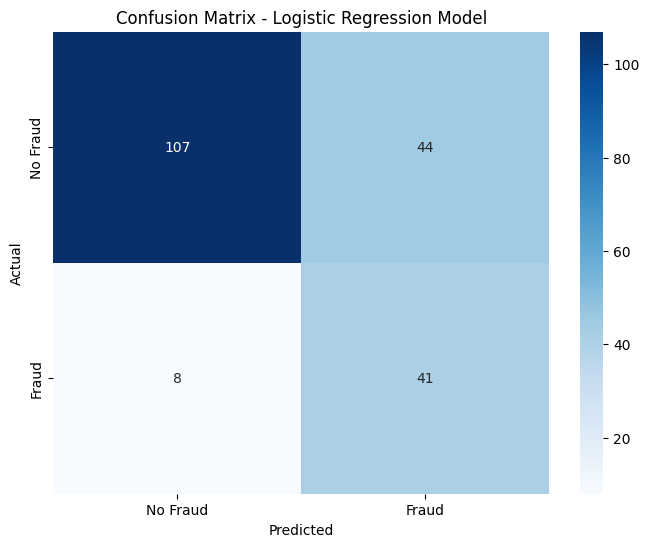

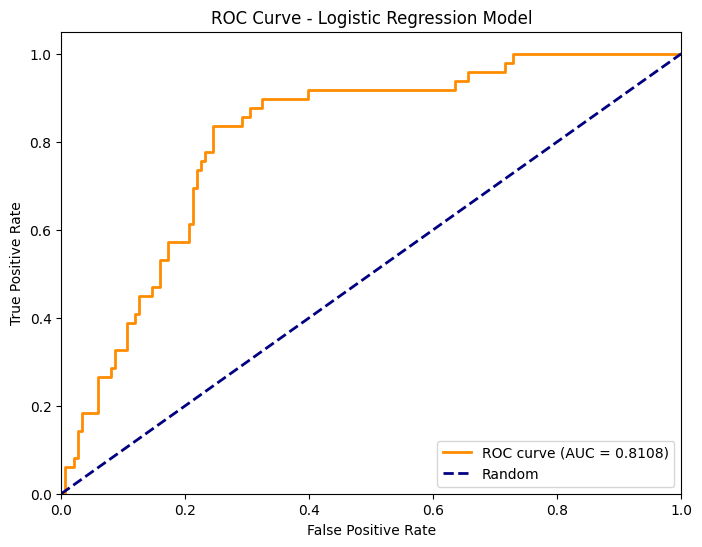

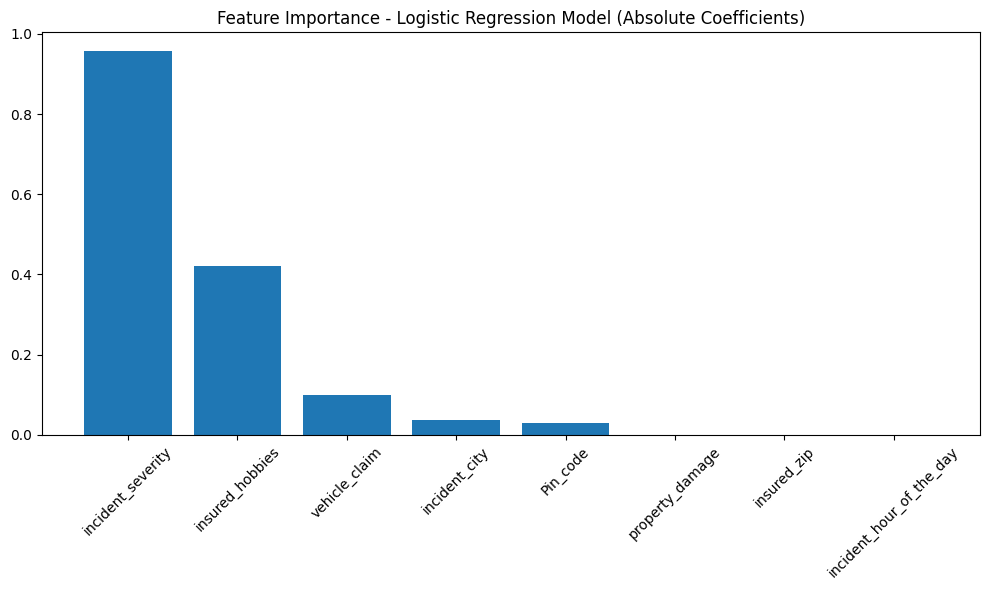


=== Feature Importance Rankings (Absolute Coefficients) ===
incident_severity: -0.9559 (abs: 0.9559)
insured_hobbies: 0.4202 (abs: 0.4202)
vehicle_claim: 0.0985 (abs: 0.0985)
incident_city: -0.0357 (abs: 0.0357)
Pin_code: -0.0303 (abs: 0.0303)
incident_hour_of_the_day: 0.0000 (abs: 0.0000)
property_damage: 0.0000 (abs: 0.0000)
insured_zip: 0.0000 (abs: 0.0000)

=== Coefficient Interpretation ===
Positive coefficients increase fraud probability
Negative coefficients decrease fraud probability
Larger absolute values = more important features

=== Cross-validation Results ===
CV AUC scores: [0.84784912 0.73850392 0.76       0.79333333 0.775625  ]
Mean CV AUC: 0.7831 (+/- 0.0742)


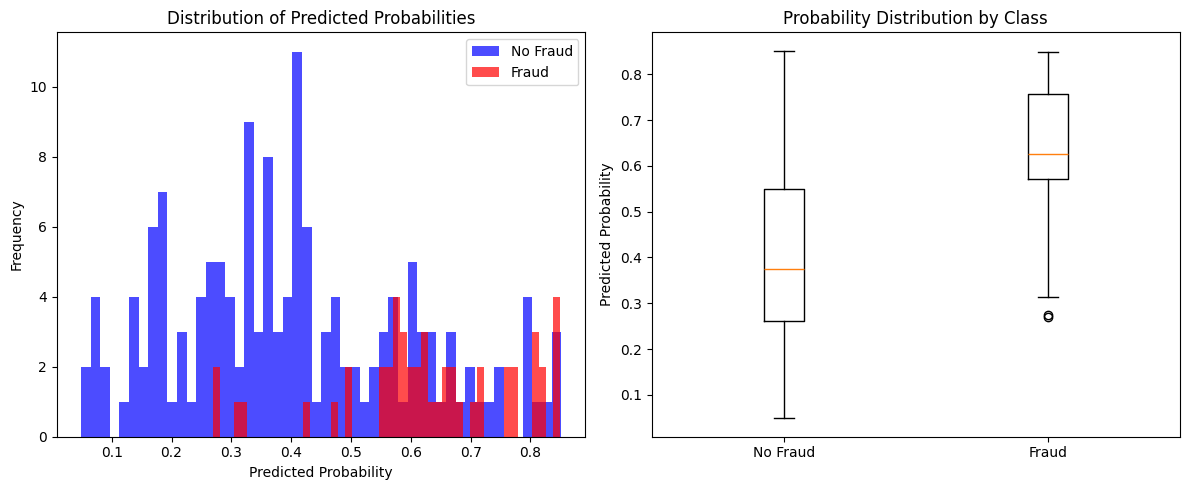


=== Threshold Optimization ===
Threshold 0.1: F1-Score = 0.4066
Threshold 0.2: F1-Score = 0.4434
Threshold 0.3: F1-Score = 0.4772
Threshold 0.4: F1-Score = 0.5389
Threshold 0.5: F1-Score = 0.6119
Threshold 0.6: F1-Score = 0.5234
Threshold 0.7: F1-Score = 0.4103
Threshold 0.8: F1-Score = 0.2857

Best threshold: 0.5 with F1-Score: 0.6119


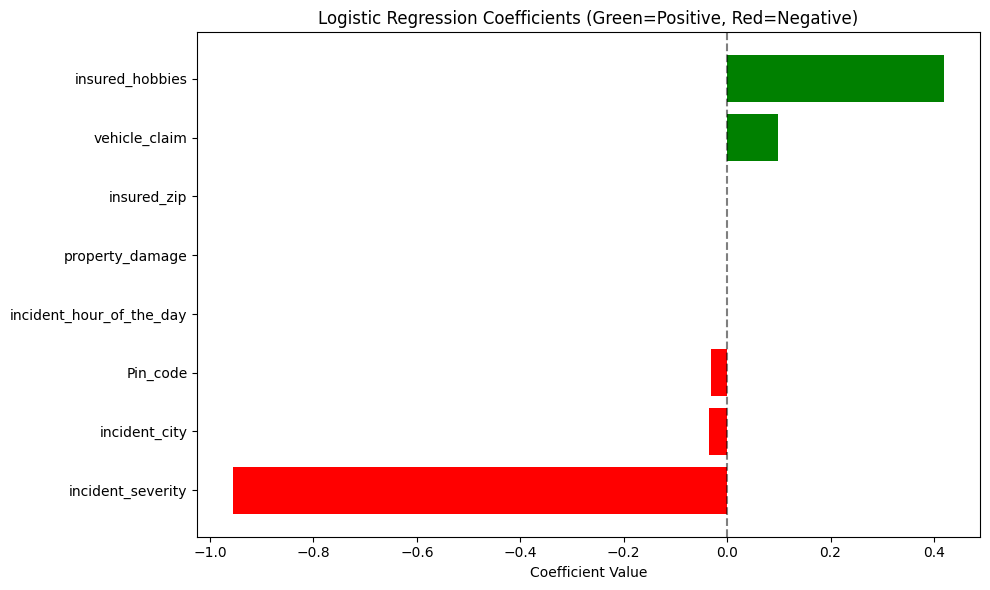


Install statsmodels for statistical significance testing: pip install statsmodels

Logistic Regression model and scaler saved successfully!

=== Logistic Regression Model Summary ===
Best Parameters: {'C': 0.1, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'saga'}
Number of Features: 8
Features Used: ['incident_severity', 'insured_hobbies', 'incident_hour_of_the_day', 'Pin_code', 'insured_zip', 'property_damage', 'vehicle_claim', 'incident_city']
Final Test Accuracy: 0.7400
Final Test AUC: 0.8108
Final Test Precision: 0.4824
Final Test Recall: 0.8367
Final Test F1-Score: 0.6119
Class Weights Used: {np.int64(0): np.float64(0.6644518272425249), np.int64(1): np.float64(2.0202020202020203)}
Best Decision Threshold: 0.5

=== Performance at Different Thresholds ===
Threshold | Accuracy | Precision | Recall | F1-Score
--------------------------------------------------
0.3       | 0.4850   | 0.3176    | 0.9592 | 0.4772
0.4       | 0.6150   | 0.3814    | 0.9184 | 0.5389
0.5       | 0.7400   | 0

In [42]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
# Replace 'your_dataset.csv' with the actual path to your all_numerical dataset
df = all_numerical

# Define the important features based on feature importance analysis
important_features = [
    'incident_severity',
    'insured_hobbies', 
    'incident_hour_of_the_day',
    'Pin_code',
    'insured_zip',
    'property_damage',
    'vehicle_claim',
    'incident_city'
]

# Prepare the data
X = df[important_features]
y = df['fraud_reported']

# Check for missing values
print("Missing values in features:")
print(X.isnull().sum())
print(f"\nMissing values in target: {y.isnull().sum()}")

# Handle missing values if any
X = X.fillna(X.median())  # Fill numeric columns with median

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")
print(f"Class distribution in training set:")
print(y_train.value_counts(normalize=True))

# Scale the features (important for Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Calculate class weights for imbalanced dataset
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(zip(np.unique(y_train), class_weights))
print(f"Class weights: {class_weight_dict}")

# Initialize Logistic Regression classifier
logistic_model = LogisticRegression(
    random_state=42,
    class_weight='balanced',
    max_iter=1000
)

# Train the initial model
print("\n=== Training Initial Logistic Regression Model ===")
logistic_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = logistic_model.predict(X_test_scaled)
y_pred_proba = logistic_model.predict_proba(X_test_scaled)[:, 1]

# Calculate initial metrics
initial_accuracy = accuracy_score(y_test, y_pred)
initial_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Initial Accuracy: {initial_accuracy:.4f}")
print(f"Initial AUC Score: {initial_auc:.4f}")
print("\nInitial Classification Report:")
print(classification_report(y_test, y_pred))

# Hyperparameter tuning
print("\n=== Hyperparameter Tuning ===")

# Define parameter grid for Logistic Regression
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [1000, 2000]
}

# Grid search with cross-validation
grid_search = GridSearchCV(
    LogisticRegression(
        random_state=42,
        class_weight='balanced'
    ),
    param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_scaled, y_train)

# Best model after tuning
best_logistic_model = grid_search.best_estimator_
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation AUC: {grid_search.best_score_:.4f}")

# Final evaluation
y_pred_final = best_logistic_model.predict(X_test_scaled)
y_pred_proba_final = best_logistic_model.predict_proba(X_test_scaled)[:, 1]

final_accuracy = accuracy_score(y_test, y_pred_final)
final_auc = roc_auc_score(y_test, y_pred_proba_final)

print(f"\n=== Final Model Performance ===")
print(f"Final Accuracy: {final_accuracy:.4f}")
print(f"Final AUC Score: {final_auc:.4f}")
print("\nFinal Classification Report:")
print(classification_report(y_test, y_pred_final))

# Additional metrics
precision = precision_score(y_test, y_pred_final)
recall = recall_score(y_test, y_pred_final)
f1 = f1_score(y_test, y_pred_final)

print(f"\n=== Additional Metrics ===")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_final)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Fraud', 'Fraud'], 
            yticklabels=['No Fraud', 'Fraud'])
plt.title('Confusion Matrix - Logistic Regression Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_final)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {final_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression Model')
plt.legend(loc="lower right")
plt.show()

# Feature Importance from Logistic Regression (Coefficients)
feature_importance = abs(best_logistic_model.coef_[0])
feature_names = important_features

plt.figure(figsize=(10, 6))
indices = np.argsort(feature_importance)[::-1]
plt.bar(range(len(feature_importance)), feature_importance[indices])
plt.xticks(range(len(feature_importance)), [feature_names[i] for i in indices], rotation=45)
plt.title('Feature Importance - Logistic Regression Model (Absolute Coefficients)')
plt.tight_layout()
plt.show()

# Print feature importance values and actual coefficients
print("\n=== Feature Importance Rankings (Absolute Coefficients) ===")
feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'coefficient': best_logistic_model.coef_[0],
    'abs_coefficient': feature_importance
}).sort_values('abs_coefficient', ascending=False)

for idx, row in feature_importance_df.iterrows():
    print(f"{row['feature']}: {row['coefficient']:.4f} (abs: {row['abs_coefficient']:.4f})")

# Interpretation of coefficients
print("\n=== Coefficient Interpretation ===")
print("Positive coefficients increase fraud probability")
print("Negative coefficients decrease fraud probability")
print("Larger absolute values = more important features")

# Cross-validation scores
cv_scores = cross_val_score(best_logistic_model, X_train_scaled, y_train, cv=5, scoring='roc_auc')
print(f"\n=== Cross-validation Results ===")
print(f"CV AUC scores: {cv_scores}")
print(f"Mean CV AUC: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

# Prediction probabilities distribution
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(y_pred_proba_final[y_test == 0], bins=50, alpha=0.7, label='No Fraud', color='blue')
plt.hist(y_pred_proba_final[y_test == 1], bins=50, alpha=0.7, label='Fraud', color='red')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Probabilities')
plt.legend()

plt.subplot(1, 2, 2)
plt.boxplot([y_pred_proba_final[y_test == 0], y_pred_proba_final[y_test == 1]], 
            labels=['No Fraud', 'Fraud'])
plt.ylabel('Predicted Probability')
plt.title('Probability Distribution by Class')
plt.tight_layout()
plt.show()

# Threshold optimization
print("\n=== Threshold Optimization ===")
thresholds = np.arange(0.1, 0.9, 0.1)
best_threshold = 0.5
best_f1 = 0

for threshold in thresholds:
    y_pred_thresh = (y_pred_proba_final >= threshold).astype(int)
    f1_thresh = f1_score(y_test, y_pred_thresh)
    print(f"Threshold {threshold:.1f}: F1-Score = {f1_thresh:.4f}")
    
    if f1_thresh > best_f1:
        best_f1 = f1_thresh
        best_threshold = threshold

print(f"\nBest threshold: {best_threshold:.1f} with F1-Score: {best_f1:.4f}")

# Coefficient visualization with positive/negative separation
plt.figure(figsize=(10, 6))
coefficients = best_logistic_model.coef_[0]
colors = ['red' if coef < 0 else 'green' for coef in coefficients]
indices = np.argsort(coefficients)

plt.barh(range(len(coefficients)), coefficients[indices], color=[colors[i] for i in indices])
plt.yticks(range(len(coefficients)), [feature_names[i] for i in indices])
plt.xlabel('Coefficient Value')
plt.title('Logistic Regression Coefficients (Green=Positive, Red=Negative)')
plt.axvline(x=0, color='black', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Statistical significance (if using statsmodels)
try:
    import statsmodels.api as sm
    
    # Add constant term for statsmodels
    X_train_sm = sm.add_constant(X_train_scaled)
    logit_model = sm.Logit(y_train, X_train_sm)
    result = logit_model.fit(disp=0)
    
    print("\n=== Statistical Significance (p-values) ===")
    feature_names_with_const = ['const'] + feature_names
    for i, (feature, pval) in enumerate(zip(feature_names_with_const, result.pvalues)):
        significance = "***" if pval < 0.001 else "**" if pval < 0.01 else "*" if pval < 0.05 else ""
        print(f"{feature}: p-value = {pval:.6f} {significance}")
    
    print("\n*** p<0.001, ** p<0.01, * p<0.05")
    
except ImportError:
    print("\nInstall statsmodels for statistical significance testing: pip install statsmodels")

# Save the model and scaler
import joblib
joblib.dump(best_logistic_model, 'fraud_detection_logistic_model.pkl')
joblib.dump(scaler, 'fraud_detection_logistic_scaler.pkl')
print("\nLogistic Regression model and scaler saved successfully!")

# Model summary
print("\n=== Logistic Regression Model Summary ===")
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Number of Features: {len(important_features)}")
print(f"Features Used: {important_features}")
print(f"Final Test Accuracy: {final_accuracy:.4f}")
print(f"Final Test AUC: {final_auc:.4f}")
print(f"Final Test Precision: {precision:.4f}")
print(f"Final Test Recall: {recall:.4f}")
print(f"Final Test F1-Score: {f1:.4f}")
print(f"Class Weights Used: {class_weight_dict}")
print(f"Best Decision Threshold: {best_threshold:.1f}")

# Performance comparison with different thresholds
print("\n=== Performance at Different Thresholds ===")
thresholds_detailed = [0.3, 0.4, 0.5, 0.6, 0.7]
print("Threshold | Accuracy | Precision | Recall | F1-Score")
print("-" * 50)
for thresh in thresholds_detailed:
    y_pred_thresh = (y_pred_proba_final >= thresh).astype(int)
    acc = accuracy_score(y_test, y_pred_thresh)
    prec = precision_score(y_test, y_pred_thresh)
    rec = recall_score(y_test, y_pred_thresh)
    f1_thresh = f1_score(y_test, y_pred_thresh)
    print(f"{thresh:.1f}       | {acc:.4f}   | {prec:.4f}    | {rec:.4f} | {f1_thresh:.4f}")

# Model interpretability summary
print("\n=== Model Interpretability Summary ===")
print("Logistic Regression provides highly interpretable results:")
print("- Coefficients show the log-odds change for each feature")
print("- Positive coefficients increase fraud probability")
print("- Negative coefficients decrease fraud probability")
print("- Feature scaling allows direct comparison of coefficient magnitudes")
print("- Each coefficient represents the change in log-odds for a 1-unit change in the feature")